In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/MyDrive/Knowledge Graphs 2022/data/'
import pandas as pd
df_tweets_full=pd.read_csv(path+'tweets_w_recovered_50_topics.csv')
len(df_tweets_full) #923385
df_tweets=df_tweets_full[df_tweets_full['cleaned_text']!='[]']
len(df_tweets) #784534
#df_tweets

Mounted at /content/drive


914721

#Tweets per day analysis

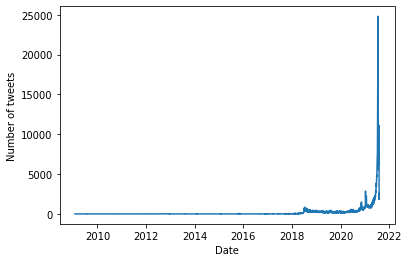

In [ ]:
df_tweets_full.columns
df_tweets_dates=df_tweets_full[['time','id']]
dates=list(df_tweets_dates['time'])
import datetime
dates_in_dateform=list()
for date in dates:
  d=datetime.datetime.strptime(date, '%a %b %d %H:%M:%S %z %Y').strftime('%b %d %Y')
  dates_in_dateform.append(datetime.datetime.strptime(d,'%b %d %Y'))
#dates_in_dateform
#len(dates_in_dateform)
from collections import Counter
tweets_per_day=dict(Counter(dates_in_dateform))
sorted_dict=dict(sorted(tweets_per_day.items()))
import matplotlib.pyplot as plt
plt.plot(list(sorted_dict.keys()),list(sorted_dict.values()))
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


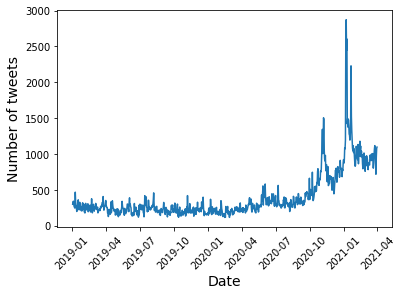

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Change points:  [Timestamp('2020-05-20 00:00:00'), Timestamp('2020-10-17 00:00:00'), Timestamp('2020-12-31 00:00:00'), Timestamp('2021-03-31 00:00:00')]


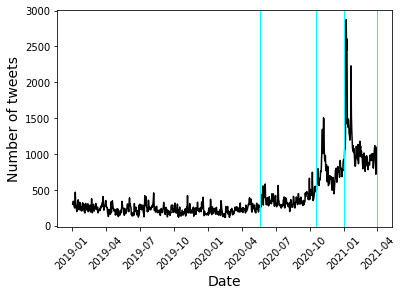

In [ ]:
df_tweets_dates['time']=dates_in_dateform
df_tweets_needed=df_tweets_dates[(df_tweets_dates['time']>datetime.datetime(2019,1,1))&(df_tweets_dates['time']<datetime.datetime(2021,4,1))]
times_needed=list(df_tweets_needed['time'])
tweets_per_day=dict(Counter(times_needed))
sorted_dict=dict(sorted(tweets_per_day.items()))
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sorted_dict.keys()),list(sorted_dict.values()))
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of tweets',fontsize=14)
plt.xticks(rotation=45,fontsize=10)
plt.show()

#Use PELT algorithm:
! pip install ruptures
import numpy as np
import ruptures as rpt
#Changepoint detection with the Pelt search method
#model="rbf"
n_tweets=np.array(list(sorted_dict.values()))
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(n_tweets)
result = algo.predict(n_bkps=3)
#algo = rpt.Pelt(model=model).fit(mean_vol)
#result = algo.predict(pen=5) # change pen to change number of change points
sorted_dates=np.array(list(sorted_dict.keys()))
plt.figure()
plt.plot(sorted_dates, n_tweets,color='black')
print("Change points: ", [sorted_dates[i-1] for i in result]) 
for r in result:
    plt.axvline(x=sorted_dates[r-1], color = 'aqua', linewidth = 1)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of tweets',fontsize=14)
plt.xticks(rotation=45,fontsize=10)
plt.savefig('drive/MyDrive/Knowledge Graphs 2022/data/re_time_series1.pdf',bbox_inches='tight')
plt.show()
#plt.savefig('drive/MyDrive/Knowledge Graphs 2022/data/time_series1.pdf')

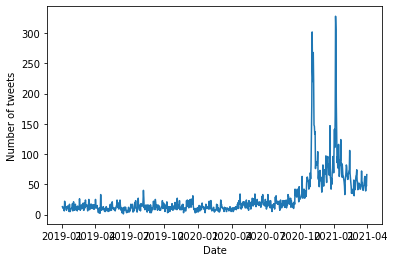

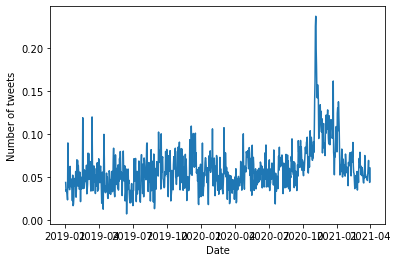

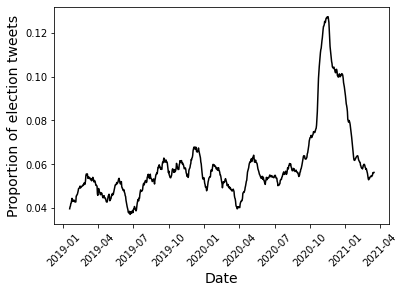

In [ ]:
#Look at the proportion of tweets of particular_topic
list_ids=list(df_tweets_needed['id'])
df_topics_times=df_tweets_full[df_tweets_full['id'].isin(list_ids)][['time','topic']]
df_elections_topic=df_topics_times[df_topics_times['topic']==0]
dates=list(df_elections_topic['time'])
import datetime
dates_in_dateform=list()
for date in dates:
  d=datetime.datetime.strptime(date, '%a %b %d %H:%M:%S %z %Y').strftime('%b %d %Y')
  dates_in_dateform.append(datetime.datetime.strptime(d,'%b %d %Y'))
#dates_in_dateform
#len(dates_in_dateform)
from collections import Counter
tweets_per_day_elections=dict(Counter(dates_in_dateform))
sorted_dict_elections=dict(sorted(tweets_per_day_elections.items()))
import matplotlib.pyplot as plt
plt.plot(list(sorted_dict_elections.keys()),list(sorted_dict_elections.values()))
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.show()

#Get the proportion of tweets:
proportion_election_tweets=dict()
for i in sorted_dict.keys():
  if i in sorted_dict_elections.keys():
    proportion_election_tweets[i]=sorted_dict_elections[i]/sorted_dict[i]
  else:
    proportion_election_tweets[i]=0

plt.plot(list(proportion_election_tweets.keys()),list(proportion_election_tweets.values()))
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.show()

#Take the mean:
means=[np.mean(list(proportion_election_tweets.values())[i-15:i+15]) for i in range(15,len(list(proportion_election_tweets.values()))-15)]
dates=list(proportion_election_tweets.keys())[15:len(list(proportion_election_tweets.keys()))-15]
plt.plot(dates,means,color='black')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Proportion of election tweets',fontsize=14)
plt.xticks(rotation=45,fontsize=10)
# plt.axvline(datetime.datetime(2020,11,3),color='aqua')
plt.savefig('drive/MyDrive/Knowledge Graphs 2022/data/re_time_series2.pdf',bbox_inches='tight')
plt.show()

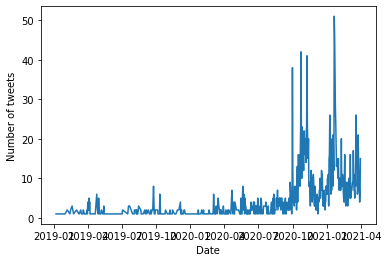

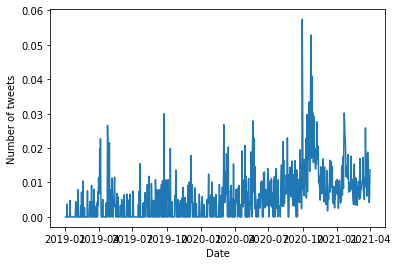

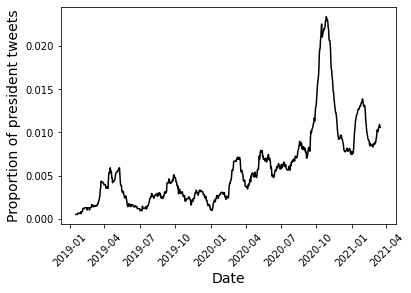

In [ ]:
list_ids=list(df_tweets_needed['id'])
df_topics_times=df_tweets_full[df_tweets_full['id'].isin(list_ids)][['time','topic']]
df_elections_topic=df_topics_times[df_topics_times['topic']==1]
dates=list(df_elections_topic['time'])
import datetime
dates_in_dateform=list()
for date in dates:
  d=datetime.datetime.strptime(date, '%a %b %d %H:%M:%S %z %Y').strftime('%b %d %Y')
  dates_in_dateform.append(datetime.datetime.strptime(d,'%b %d %Y'))
#dates_in_dateform
#len(dates_in_dateform)
from collections import Counter
tweets_per_day_elections=dict(Counter(dates_in_dateform))
sorted_dict_elections=dict(sorted(tweets_per_day_elections.items()))
import matplotlib.pyplot as plt
plt.plot(list(sorted_dict_elections.keys()),list(sorted_dict_elections.values()))
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.show()

#Get the proportion of tweets:
proportion_election_tweets=dict()
for i in sorted_dict.keys():
  if i in sorted_dict_elections.keys():
    proportion_election_tweets[i]=sorted_dict_elections[i]/sorted_dict[i]
  else:
    proportion_election_tweets[i]=0

plt.plot(list(proportion_election_tweets.keys()),list(proportion_election_tweets.values()))
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.show()

#Take the mean:
means=[np.mean(list(proportion_election_tweets.values())[i-15:i+15]) for i in range(15,len(list(proportion_election_tweets.values()))-15)]
dates=list(proportion_election_tweets.keys())[15:len(list(proportion_election_tweets.keys()))-15]
plt.plot(dates,means,color='black')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Proportion of president tweets',fontsize=14)
plt.xticks(rotation=45,fontsize=10)
# plt.axvline(datetime.datetime(2020,11,3),color='aqua')
# plt.axvline(datetime.datetime(2021,1,6),color='aqua')
plt.savefig('drive/MyDrive/Knowledge Graphs 2022/data/re_time_series3.pdf',bbox_inches='tight')
plt.show()

#Emotion analysis

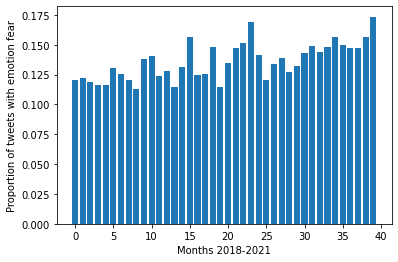

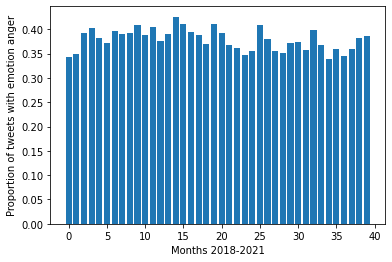

In [ ]:
date_emotion=df_tweets[['time','emotion']]
date_emotion
dates=list(date_emotion['time'])
emotions=list(date_emotion['emotion'])
emotions
from collections import Counter
Counter(emotions)
import datetime
dates_in_dateform=list()
for date in dates:
  d=datetime.datetime.strptime(date, '%a %b %d %H:%M:%S %z %Y').strftime('%b %d %Y')
  dates_in_dateform.append(datetime.datetime.strptime(d,'%b %d %Y'))
dates_in_dateform
emotion_per_date=pd.DataFrame({'emotion':emotions,'date':dates_in_dateform},columns=['emotion','date'])

#Divide data into months
begin = '2021-01-01'
begin = '2018-05-01'
end = '2021-12-31'
dt_start = datetime.datetime.strptime(begin, '%Y-%m-%d')
dt_end = datetime.datetime.strptime(end, '%Y-%m-%d')
one_day = datetime.timedelta(1)
start_dates = [dt_start]
end_dates = []
today = dt_start
while today <= dt_end:
    #print(today)
    tomorrow = today + one_day
    if tomorrow.month != today.month:
        start_dates.append(tomorrow)
        end_dates.append(today)
    today = tomorrow

end_dates.append(dt_end)

emotions_per_month=dict()
for i in range(len(start_dates)):
  emotions_in_period=emotion_per_date[(emotion_per_date['date']>=start_dates[i])&(emotion_per_date['date']<=end_dates[i])]
  emotions=list(emotions_in_period['emotion'])
  emotions_per_month[i+1]=emotions
#len(emotions_per_month)
#emotions_per_month
from collections import Counter
for i in range(1,len(emotions_per_month)-1):
  emotions_dict=dict(Counter(emotions_per_month[i]))
  #dict_you_want = { your_key: emotions_dict[your_key] for your_key in ['joy','fear','sadness','anger','love','surprise']}
  #emotions_per_month[i]=dict_you_want
  emotions_per_month[i]=emotions_dict
#len(emotions_per_month)
#emotions_per_month

fear_per_month=dict()
anger_per_month=dict()
joy_per_month=dict()
sadness_per_month=dict()
love_per_month=dict()
surprise_per_month=dict()
for i in range(1,len(emotions_per_month)-4):
  if 'fear' in emotions_per_month[i].keys():
    fear_per_month[i]=emotions_per_month[i]['fear']/sum(emotions_per_month[i].values())
  if 'anger' in emotions_per_month[i].keys(): 
    anger_per_month[i]=emotions_per_month[i]['anger']/sum(emotions_per_month[i].values())
  if 'joy' in emotions_per_month[i].keys():
    joy_per_month[i]=emotions_per_month[i]['joy']/sum(emotions_per_month[i].values())
  if 'sadness' in emotions_per_month[i].keys():
    sadness_per_month[i]=emotions_per_month[i]['sadness']/sum(emotions_per_month[i].values())
  if 'love' in emotions_per_month[i].keys():
    love_per_month[i]=emotions_per_month[i]['love']/sum(emotions_per_month[i].values())
  if 'surprise' in emotions_per_month[i].keys():
    surprise_per_month[i]=emotions_per_month[i]['surprise']/sum(emotions_per_month[i].values())
fear_per_month
anger_per_month
joy_per_month
sadness_per_month
love_per_month
surprise_per_month

import matplotlib.pyplot as plt
names = list(fear_per_month.keys())
values = list(fear_per_month.values())

plt.bar(range(len(fear_per_month)), values)
plt.xlabel('Months 2018-2021')
plt.ylabel('Proportion of tweets with emotion fear')
plt.show()

names = list(anger_per_month.keys())
values = list(anger_per_month.values())

plt.bar(range(len(anger_per_month)), values)
plt.xlabel('Months 2018-2021')
plt.ylabel('Proportion of tweets with emotion anger')
plt.show()


#Sliding window to detect changes

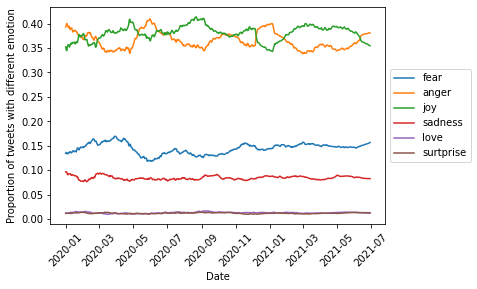

In [ ]:
begin = '2021-01-01'
begin='2020-01-01'
end = '2021-07-31'
dt_start = datetime.datetime.strptime(begin, '%Y-%m-%d')
dt_end = datetime.datetime.strptime(end, '%Y-%m-%d')
n_days =(dt_end - dt_start).days
sliding_window=dict()
for i in range(n_days-30):
  begin=dt_start+datetime.timedelta(days = i)
  end=begin+datetime.timedelta(days = 30)
  emotions_in_period=emotion_per_date[(emotion_per_date['date']>=begin)&(emotion_per_date['date']<=end)]
  emotions=list(emotions_in_period['emotion'])
  sliding_window[begin]=emotions

emotions_per_window=dict()
from collections import Counter
for i in sliding_window.keys():
  emotions_dict=dict(Counter(sliding_window[i]))
  #dict_you_want = { your_key: emotions_dict[your_key] for your_key in ['joy','fear','sadness','anger','love','surprise']}
  #emotions_per_window[i]=dict_you_want
  emotions_per_window[i]=emotions_dict
#emotions_per_window

fear_per_window=dict()
anger_per_window=dict()
joy_per_window=dict()
sadness_per_window=dict()
love_per_window=dict()
surprise_per_window=dict()
for i in emotions_per_window.keys():
  if 'fear' in emotions_per_window[i].keys():
    fear_per_window[i]=emotions_per_window[i]['fear']/sum(emotions_per_window[i].values())
  if 'anger' in emotions_per_window[i].keys():
    anger_per_window[i]=emotions_per_window[i]['anger']/sum(emotions_per_window[i].values())
  if 'joy' in emotions_per_window[i].keys():
    joy_per_window[i]=emotions_per_window[i]['joy']/sum(emotions_per_window[i].values())
  if 'sadness' in emotions_per_window[i].keys():
    sadness_per_window[i]=emotions_per_window[i]['sadness']/sum(emotions_per_window[i].values())
  if 'love' in emotions_per_window[i].keys():
    love_per_window[i]=emotions_per_window[i]['love']/sum(emotions_per_window[i].values())
  if 'surprise' in emotions_per_window[i].keys():
    surprise_per_window[i]=emotions_per_window[i]['surprise']/sum(emotions_per_window[i].values())
fear_per_window
plt.plot(list(fear_per_window.keys()),list(fear_per_window.values()),label='fear')
plt.xlabel('Date')
plt.ylabel('Proportion of fear tweets in 30 day period after the date')
anger_per_window
plt.plot(list(anger_per_window.keys()),list(anger_per_window.values()),label='anger')
plt.xlabel('Date')
plt.ylabel('Proportion of anger tweets in 30 day period after the date')
joy_per_window
plt.plot(list(joy_per_window.keys()),list(joy_per_window.values()),label='joy')
plt.xlabel('Date')
plt.ylabel('Proportion of joy tweets in 30 day period after the date')
sadness_per_window
plt.plot(list(sadness_per_window.keys()),list(sadness_per_window.values()),label='sadness')
plt.xlabel('Date')
plt.ylabel('Proportion of sadness tweets in 30 day period after the date')
love_per_window
plt.plot(list(love_per_window.keys()),list(love_per_window.values()),label='love')
plt.xlabel('Date')
plt.ylabel('Proportion of love tweets in 30 day period after the date')
surprise_per_window
plt.plot(list(surprise_per_window.keys()),list(surprise_per_window.values()),label='surtprise')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Proportion of surprise tweets in 30 day period after the date')
plt.ylabel('Proportion of tweets with different emotion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#Change point detection


Change points:  [datetime.datetime(2020, 2, 29, 0, 0), datetime.datetime(2020, 5, 4, 0, 0), datetime.datetime(2020, 6, 18, 0, 0), datetime.datetime(2021, 2, 3, 0, 0), datetime.datetime(2021, 6, 30, 0, 0)]
Change points:  [datetime.datetime(2020, 2, 29, 0, 0), datetime.datetime(2020, 5, 4, 0, 0), datetime.datetime(2020, 6, 18, 0, 0), datetime.datetime(2021, 2, 3, 0, 0), datetime.datetime(2021, 6, 30, 0, 0)]


(array([737425., 737485., 737546., 737607., 737669., 737730., 737791.,
        737850., 737911., 737972.]),
 <a list of 10 Text major ticklabel objects>)

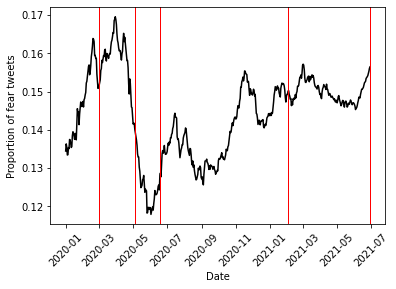

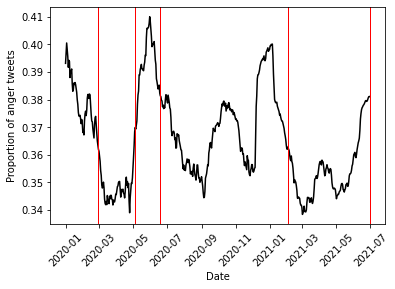

In [ ]:
###### Do the change point detection #####
#change point detection
#rupture module 
import numpy as np
import matplotlib.pyplot as plt
! pip install ruptures

import ruptures as rpt
#Changepoint detection with the Pelt search method
#model="rbf"
mean_fear=np.array(list(fear_per_window.values()))
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(mean_fear)
result = algo.predict(n_bkps=3)
#algo = rpt.Pelt(model=model).fit(mean_vol)
#result = algo.predict(pen=5) # change pen to change number of change points
sorted_dates=np.array(list(fear_per_window.keys()))
plt.figure()
plt.plot(sorted_dates, mean_fear,color='black')
print("Change points: ", [sorted_dates[i-1] for i in result]) 
for r in result:
    plt.axvline(x=sorted_dates[r-1], color = 'red', linewidth = 1)
plt.xlabel('Date')
plt.ylabel('Proportion of fear tweets')
plt.xticks(rotation=45)
#Changepoint detection with the Pelt search method
#model="rbf"
mean_anger=np.array(list(anger_per_window.values()))
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(mean_anger)
result = algo.predict(n_bkps=4)
#algo = rpt.Pelt(model=model).fit(mean_vol)
#result = algo.predict(pen=5) # change pen to change number of change points
sorted_dates=np.array(list(anger_per_window.keys()))
plt.figure()
plt.plot(sorted_dates, mean_anger,color='black')
print("Change points: ", [sorted_dates[i-1] for i in result]) 
for r in result:
    plt.axvline(x=sorted_dates[r-1], color = 'red', linewidth = 1)
plt.xlabel('Date')
plt.ylabel('Proportion of anger tweets')
plt.xticks(rotation=45)


#Emotion change per topic


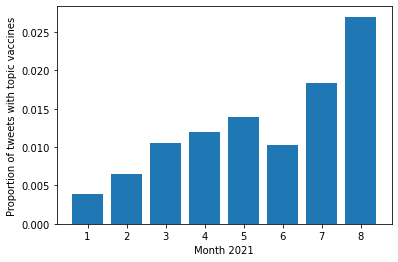

In [ ]:
df_tweets=pd.read_csv(path+'all_tweets.csv')
len(df_tweets) #923385
df_tweets=df_tweets[df_tweets['cleaned_text']!='[]']
len(df_tweets) #784534

date_topic=df_tweets[['time','topic']]
date_topic
dates=list(date_topic['time'])
topics=list(date_topic['topic'])
topics
from collections import Counter
Counter(topics)
import datetime
dates_in_dateform=list()
for date in dates:
  d=datetime.datetime.strptime(date, '%a %b %d %H:%M:%S %z %Y').strftime('%b %d %Y')
  dates_in_dateform.append(datetime.datetime.strptime(d,'%b %d %Y'))
dates_in_dateform
topic_per_date=pd.DataFrame({'topic':topics,'date':dates_in_dateform},columns=['topic','date'])

#topic_per_date
#Divide data into months
begin = '2021-01-01'
end = '2021-12-31'
dt_start = datetime.datetime.strptime(begin, '%Y-%m-%d')
dt_end = datetime.datetime.strptime(end, '%Y-%m-%d')
one_day = datetime.timedelta(1)
start_dates = [dt_start]
end_dates = []
today = dt_start
while today <= dt_end:
    #print(today)
    tomorrow = today + one_day
    if tomorrow.month != today.month:
        start_dates.append(tomorrow)
        end_dates.append(today)
    today = tomorrow

end_dates.append(dt_end)

topics_per_month=dict()
for i in range(len(start_dates)):
  topics_in_period=topic_per_date[(topic_per_date['date']>=start_dates[i])&(topic_per_date['date']<=end_dates[i])]
  topics=list(topics_in_period['topic'])
  topics_per_month[i+1]=topics

topics_per_month
from collections import Counter
for i in range(1,9):
  topics_per_month[i]=dict(Counter(topics_per_month[i]))
topics_per_month

vaccines_per_month=dict()
for i in range(1,9):
  vaccines_per_month[i]=topics_per_month[i][1]/sum(topics_per_month[i].values())

import matplotlib.pyplot as plt
names = list(vaccines_per_month.keys())
values = list(vaccines_per_month.values())

plt.bar(range(len(vaccines_per_month)), values, tick_label=names)
plt.xlabel('Month 2021')
plt.ylabel('Proportion of tweets with topic vaccines')
plt.show()

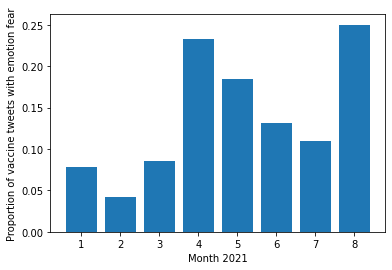

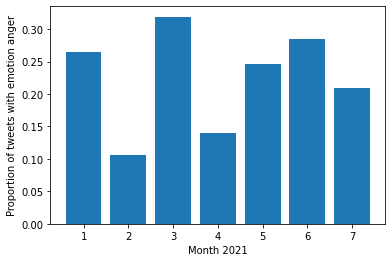

In [ ]:
########### Get emotions for the topic of vaccines per month
#df_tweets=df_tweets[df_tweets['topic']==2] #biden
df_tweets=df_tweets[df_tweets['topic']==78] #trump
len(df_tweets) #8232

date_emotion=df_tweets[['time','emotion']]
date_emotion
dates=list(date_emotion['time'])
emotions=list(date_emotion['emotion'])
emotions
from collections import Counter
Counter(emotions)
import datetime
dates_in_dateform=list()
for date in dates:
  d=datetime.datetime.strptime(date, '%a %b %d %H:%M:%S %z %Y').strftime('%b %d %Y')
  dates_in_dateform.append(datetime.datetime.strptime(d,'%b %d %Y'))
dates_in_dateform
emotion_per_date=pd.DataFrame({'emotion':emotions,'date':dates_in_dateform},columns=['emotion','date'])

#Divide data into months
begin = '2021-01-01'
end = '2021-12-31'
dt_start = datetime.datetime.strptime(begin, '%Y-%m-%d')
dt_end = datetime.datetime.strptime(end, '%Y-%m-%d')
one_day = datetime.timedelta(1)
start_dates = [dt_start]
end_dates = []
today = dt_start
while today <= dt_end:
    #print(today)
    tomorrow = today + one_day
    if tomorrow.month != today.month:
        start_dates.append(tomorrow)
        end_dates.append(today)
    today = tomorrow

end_dates.append(dt_end)

emotions_per_month=dict()
for i in range(len(start_dates)):
  emotions_in_period=emotion_per_date[(emotion_per_date['date']>=start_dates[i])&(emotion_per_date['date']<=end_dates[i])]
  emotions=list(emotions_in_period['emotion'])
  emotions_per_month[i+1]=emotions

from collections import Counter
for i in range(1,12):
  emotions_dict=dict(Counter(emotions_per_month[i]))
  #dict_you_want = { your_key: emotions_dict[your_key] for your_key in ['fear','sadness','anger','joy','surprise','love']}
  emotions_per_month[i]=emotions_dict
emotions_per_month

fear_per_month=dict()
anger_per_month=dict()
joy_per_month=dict()
sadness_per_month=dict()
love_per_month=dict()
surprise_per_month=dict()
for i in range(1,9):
  if 'fear' in emotions_per_month[i].keys():
    fear_per_month[i]=emotions_per_month[i]['fear']/sum(emotions_per_month[i].values())
  if 'anger' in emotions_per_month[i].keys(): 
    anger_per_month[i]=emotions_per_month[i]['anger']/sum(emotions_per_month[i].values())
  if 'joy' in emotions_per_month[i].keys():
    joy_per_month[i]=emotions_per_month[i]['joy']/sum(emotions_per_month[i].values())
  if 'sadness' in emotions_per_month[i].keys():
    sadness_per_month[i]=emotions_per_month[i]['sadness']/sum(emotions_per_month[i].values())
  if 'love' in emotions_per_month[i].keys():
    love_per_month[i]=emotions_per_month[i]['love']/sum(emotions_per_month[i].values())
  if 'surprise' in emotions_per_month[i].keys():
    surprise_per_month[i]=emotions_per_month[i]['surprise']/sum(emotions_per_month[i].values())
fear_per_month
anger_per_month
joy_per_month
sadness_per_month
love_per_month
surprise_per_month

import matplotlib.pyplot as plt
names = list(fear_per_month.keys())
values = list(fear_per_month.values())

plt.bar(range(len(fear_per_month)), values, tick_label=names)
plt.xlabel('Month 2021')
plt.ylabel('Proportion of vaccine tweets with emotion fear')
plt.show()

names = list(anger_per_month.keys())
values = list(anger_per_month.values())

plt.bar(range(len(anger_per_month)), values, tick_label=names)
plt.xlabel('Month 2021')
plt.ylabel('Proportion of tweets with emotion anger')
plt.show()

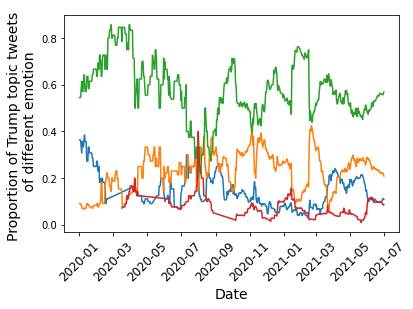

In [ ]:
begin = '2021-01-01'
begin='2020-01-01'
end = '2021-07-31'
dt_start = datetime.datetime.strptime(begin, '%Y-%m-%d')
dt_end = datetime.datetime.strptime(end, '%Y-%m-%d')
n_days =(dt_end - dt_start).days
sliding_window=dict()
for i in range(n_days-30):
  begin=dt_start+datetime.timedelta(days = i)
  end=begin+datetime.timedelta(days = 30)
  emotions_in_period=emotion_per_date[(emotion_per_date['date']>=begin)&(emotion_per_date['date']<=end)]
  emotions=list(emotions_in_period['emotion'])
  sliding_window[begin]=emotions

emotions_per_window=dict()
from collections import Counter
for i in sliding_window.keys():
  emotions_dict=dict(Counter(sliding_window[i]))
  #dict_you_want = { your_key: emotions_dict[your_key] for your_key in ['fear','sadness','anger','love','surprise','joy']}
  emotions_per_window[i]=emotions_dict

emotions_per_window

fear_per_window=dict()
anger_per_window=dict()
joy_per_window=dict()
sadness_per_window=dict()
love_per_window=dict()
surprise_per_window=dict()
for i in emotions_per_window.keys():
  if 'fear' in emotions_per_window[i].keys():
    fear_per_window[i]=emotions_per_window[i]['fear']/sum(emotions_per_window[i].values())
  if 'anger' in emotions_per_window[i].keys(): 
    anger_per_window[i]=emotions_per_window[i]['anger']/sum(emotions_per_window[i].values())
  if 'joy' in emotions_per_window[i].keys():
    joy_per_window[i]=emotions_per_window[i]['joy']/sum(emotions_per_window[i].values())
  if 'sadness' in emotions_per_window[i].keys():
    sadness_per_window[i]=emotions_per_window[i]['sadness']/sum(emotions_per_window[i].values())
  if 'love' in emotions_per_window[i].keys():
    love_per_window[i]=emotions_per_window[i]['love']/sum(emotions_per_window[i].values())
  if 'surprise' in emotions_per_window[i].keys():
    surprise_per_window[i]=emotions_per_window[i]['surprise']/sum(emotions_per_window[i].values())
fear_per_window
plt.plot(list(fear_per_window.keys()),list(fear_per_window.values()))
plt.xlabel('Date')
plt.ylabel('Proportion of vaccine tweets with emotion fear')
anger_per_window
plt.plot(list(anger_per_window.keys()),list(anger_per_window.values()))
plt.xlabel('Date')
plt.ylabel('Proportion of anger tweets in 30 day period after the date')
plt.ylabel('Proportion of tweets of different emotion')
joy_per_window
plt.plot(list(joy_per_window.keys()),list(joy_per_window.values()))
sadness_per_window
plt.plot(list(sadness_per_window.keys()),list(sadness_per_window.values()))
plt.xlabel('Date',fontsize=14)
plt.ylabel('Proportion of Trump topic tweets \n of different emotion',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.savefig('drive/MyDrive/Knowledge Graphs 2022/data/emotions2.pdf',bbox_inches='tight')
#love_per_window
#plt.plot(list(love_per_window.keys()),list(love_per_window.values()))
#surprise_per_window
#plt.plot(list(surprise_per_window.keys()),list(surprise_per_window.values()))

Change points:  [datetime.datetime(2020, 1, 5, 0, 0), datetime.datetime(2020, 1, 20, 0, 0), datetime.datetime(2020, 2, 19, 0, 0), datetime.datetime(2020, 12, 20, 0, 0), datetime.datetime(2021, 2, 28, 0, 0), datetime.datetime(2021, 6, 30, 0, 0)]


(array([737425., 737485., 737546., 737607., 737669., 737730., 737791.,
        737850., 737911., 737972.]),
 <a list of 10 Text major ticklabel objects>)

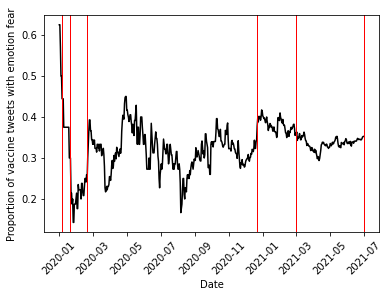

In [ ]:
#Change point detection:
mean_fear=np.array(list(fear_per_window.values()))
model = "l1"  
algo = rpt.Dynp(model=model, min_size=5, jump=5).fit(mean_fear)
result = algo.predict(n_bkps=5)
#algo = rpt.Pelt(model=model).fit(mean_vol)
#result = algo.predict(pen=5) # change pen to change number of change points
sorted_dates=np.array(list(fear_per_window.keys()))
plt.figure()
plt.plot(sorted_dates, mean_fear,color='black')
print("Change points: ", [sorted_dates[i-1] for i in result]) 
for r in result:
    plt.axvline(x=sorted_dates[r-1], color = 'red', linewidth = 1)
plt.xlabel('Date')
plt.ylabel('Proportion of vaccine tweets with emotion fear')
plt.xticks(rotation=45)

#Topic time change

In [ ]:
import datetime

In [ ]:
df_tweets=pd.read_csv(path+'tweets_w_recovered_50_topics.csv')
len(df_tweets) #923385
df_tweets=df_tweets[df_tweets['cleaned_text']!='[]']
dates_in_dateform=list()
for date in list(df_tweets['time']):
  d=datetime.datetime.strptime(date, '%a %b %d %H:%M:%S %z %Y').strftime('%b %d %Y')
  dates_in_dateform.append(datetime.datetime.strptime(d,'%b %d %Y'))
#len(dates_in_dateform)
#len(df_tweets)
df_tweets['time']=dates_in_dateform


In [ ]:
# Get tweets for particular dates:
def get_tweets(start_date,end_date,df):
  return(df[(df['time']>=start_date)&(df['time']<=end_date)])

begin = '2021-01-01'
begin='2019-01-01'
end = '2021-07-31'
start_date = datetime.datetime.strptime(begin, '%Y-%m-%d')
end_date = datetime.datetime.strptime(end, '%Y-%m-%d')
df_tweets=get_tweets(start_date,end_date,df_tweets)
len(df_tweets)

823843

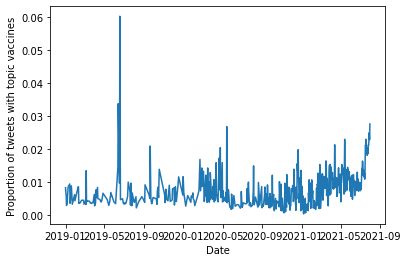

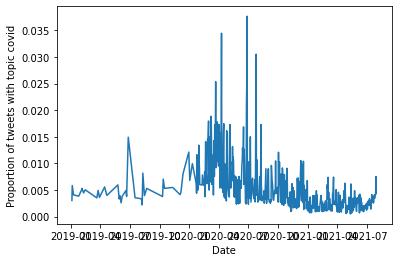

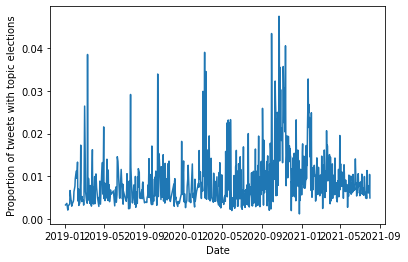

In [ ]:
#sorted_dict #tweets per day
#Topic 1 keywords: vaccine vaccinated vaccines covid
df_vaccine_tweets=df_tweets[df_tweets['topic']==1]
dates=list(df_vaccine_tweets['time'])
#dates
import datetime
dates_in_dateform=dates
#dates_in_dateform
#len(dates_in_dateform)
from collections import Counter
vaccine_tweets_per_day=dict(Counter(dates_in_dateform))
vaccine_tweets_per_day
sorted_dict_vaccine=dict(sorted(vaccine_tweets_per_day.items()))
sorted_dict_vaccine
#vaccine_tweets_per_day
proportion_vaccine_tweets=dict()
for date in sorted_dict_vaccine.keys():
  if date in vaccine_tweets_per_day.keys():
    proportion_vaccine_tweets[date]=vaccine_tweets_per_day[date]/sorted_dict[date]
  else:
    proportion_vaccine_tweets[date]=0

plt.figure()
plt.plot(list(proportion_vaccine_tweets.keys()),list(proportion_vaccine_tweets.values()))
plt.xlabel('Date')
plt.ylabel('Proportion of tweets with topic vaccines')
plt.show()

##############Do the same but for topic covid
#Topic 20 keywords: covid deaths coronavirus stfu died cases
df_covid_tweets=df_tweets[df_tweets['topic']==20]
df_covid_tweets #empty? 
dates=list(df_covid_tweets['time'])
import datetime
dates_in_dateform=dates
#dates_in_dateform
#len(dates_in_dateform)
from collections import Counter
covid_tweets_per_day=dict(Counter(dates_in_dateform))
sorted_dict_covid=dict(sorted(covid_tweets_per_day.items()))
#covid_tweets_per_day
proportion_covid_tweets=dict()
for date in sorted_dict_covid.keys():
  if date in covid_tweets_per_day.keys():
    proportion_covid_tweets[date]=covid_tweets_per_day[date]/sorted_dict[date]
  else:
    proportion_covid_tweets[date]=0

plt.figure()
plt.plot(list(proportion_covid_tweets.keys()),list(proportion_covid_tweets.values()))
plt.xlabel('Date')
plt.ylabel('Proportion of tweets with topic covid')
plt.show()

#Proportion vaccine with biden
df_biden_tweets=df_tweets[df_tweets['topic']==2]
dates=list(df_biden_tweets['time'])
#dates
import datetime
dates_in_dateform=dates
#dates_in_dateform
#len(dates_in_dateform)
from collections import Counter
biden_tweets_per_day=dict(Counter(dates_in_dateform))
biden_tweets_per_day
sorted_dict_biden=dict(sorted(biden_tweets_per_day.items()))
sorted_dict_biden

proportion_biden_tweets=dict()
for date in sorted_dict_biden.keys():
  if date in biden_tweets_per_day.keys():
    proportion_biden_tweets[date]=biden_tweets_per_day[date]/sorted_dict[date]
  else:
    proportion_biden_tweets[date]=0

plt.figure()
plt.plot(list(proportion_biden_tweets.keys()),list(proportion_biden_tweets.values()))
plt.xlabel('Date')
plt.ylabel('Proportion of tweets with topic elections')
plt.show()






#User to user network if they share hashtag

In [ ]:
user_hashtag_df=df_tweets[df_tweets['hashtags']!='[]'][['user_id','hashtags']]
user_hashtag_df
len(user_hashtag_df) #85595

dict_user_to_hashtag=dict()
for i in list(user_hashtag_df['user_id'].unique()):
  list_of_hashtags=list(user_hashtag_df[user_hashtag_df['user_id']==i]['hashtags'])
  dict_user_to_hashtag[i]=list_of_hashtags

dict_user_to_hashtag
len(user_hashtag_df['user_id'].unique()) #6447 unique users
for i in dict_user_to_hashtag.keys():
  list_of_lists=dict_user_to_hashtag[i]
  hashtags=list()
  for l in list_of_lists:
    res = l.strip('][').split(', ')
    for k in res:
      hashtags.append(k)
  dict_user_to_hashtag[i]=hashtags

for i in dict_user_to_hashtag.keys():
  dict_user_to_hashtag[i]=set(dict_user_to_hashtag[i])

#dict_user_to_hashtag

########### Make the edges with weights based on shared hashtags #########
edges_and_weights=dict()
for i in dict_user_to_hashtag.keys():
  for j in dict_user_to_hashtag.keys():
    if i!=j:
      l=len(dict_user_to_hashtag[i].intersection(dict_user_to_hashtag[j]))
      if l!=0:
        edges_and_weights[(i,j)]=l

nodes=list(dict_user_to_hashtag.keys())

import networkx as nx
user_to_user_network=nx.Graph()
user_to_user_network.add_nodes_from(nodes)
user_to_user_network.add_edges_from(list(edges_and_weights.keys()))
for edge in user_to_user_network.edges():
  user_to_user_network[edge[0]][edge[1]]['weight']=edges_and_weights[edge]

len(user_to_user_network.edges()) #536969 edges
len(user_to_user_network.nodes()) #6447 nodes
weights = list(edges_and_weights.values())
#nx.draw(user_to_user_network) #too long
#Get induced subgraphs:
S = [user_to_user_network.subgraph(c).copy() for c in nx.connected_components(user_to_user_network)]
len(S[0].nodes()) #5479
len(S[0].edges()) #536955
nx.draw(S[0],node_size=2,width=weights)


71740

#Color nodes based on emotion

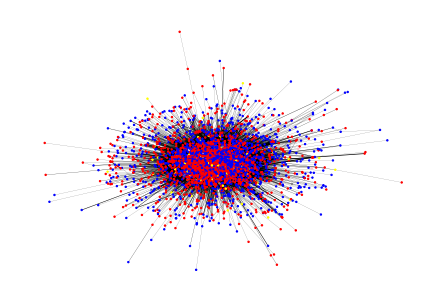

In [ ]:
user_emotion_df=df_tweets[df_tweets['user_id'].isin(user_to_user_network.nodes())][['user_id','emotion']]
dict_user_to_emotion=dict()
for i in user_to_user_network.nodes():
  dict_user_to_emotion[i]=[]
for i in user_to_user_network.nodes():
  emotion=list(user_emotion_df[user_emotion_df['user_id']==i]['emotion'])
  for e in emotion:
    dict_user_to_emotion[i].append(e)

len(dict_user_to_emotion) #6447

#Take the strongest emotion for each user:
user_strong_emotion=dict()
for i in user_to_user_network.nodes():
  user_strong_emotion[i]=max(dict_user_to_emotion[i],key=dict_user_to_emotion[i].count)

from collections import Counter
Counter(list(user_strong_emotion.values())) # Most of the tweets with hashtags are anger and joy

node_to_color=dict()
for i in S[0].nodes():
  if user_strong_emotion[i]=='anger':
    node_to_color[i]='red'
  if user_strong_emotion[i]=='fear':
    node_to_color[i]='yellow'
  if user_strong_emotion[i]=='joy':
    node_to_color[i]='blue'
  if user_strong_emotion[i]=='love':
    node_to_color[i]='pink'
  if user_strong_emotion[i]=='sadness':
    node_to_color[i]='grey'

import numpy as np
weights=np.array(weights)/10
nx.draw(S[0],node_size=2,node_color=list(node_to_color.values()),width=weights)

#### It seems like there are no visible clusters simply based on emotion

#Do clustering analysis

In [ ]:
# Get the max weight:
sorted_weights={k: v for k, v in sorted(edges_and_weights.items(), key=lambda item: item[1])}
e=list(sorted_weights.keys())[-10:]
#for edge in e:
#  print(sorted_weights[edge])
#Top 5 edges: (902119699219181569, 762702972421861376),(902119699219181569, 2956579103),(28880981, 1298150427674816514),(1008022662847893504, 1298150427674816514),(135072488, 212218311)
len(dict_user_to_hashtag[135072488])
len(dict_user_to_hashtag[212218311])

411

#User to user network if they publish tweets in the same topic

In [ ]:
user_topic_df=df_tweets[df_tweets['topic']!=-1][['user_id','topic']]
user_topic_df
len(user_topic_df) #297838

dict_user_to_topic=dict()
for i in list(user_topic_df['user_id'].unique()):
  list_of_topics=list(user_topic_df[user_topic_df['user_id']==i]['topic'])
  dict_user_to_topic[i]=list_of_topics

dict_user_to_topic
len(user_topic_df['user_id'].unique()) #11378 unique users
for i in dict_user_to_topic.keys():
  dict_user_to_topic[i]=set(dict_user_to_topic[i])

edges=list()
for i in dict_user_to_topic.keys():
  for j in dict_user_to_topic.keys():
    if i!=j:
      l=len(dict_user_to_topic[i].intersection(dict_user_to_topic[j]))
      if l!=0:
        edges.append((i,j))


nodes=list(dict_user_to_topic.keys())

import networkx as nx
user_to_user_network=nx.Graph()
user_to_user_network.add_nodes_from(nodes)
user_to_user_network.add_edges_from(edges)

#for edge in user_to_user_network.edges():
#  user_to_user_network[edge[0]][edge[1]]['weight']=edges_and_weights[edge]

len(user_to_user_network.edges()) #536969 edges
len(user_to_user_network.nodes()) #6447 nodes
weights = list(edges_and_weights.values())
#nx.draw(user_to_user_network) #too long
#Get induced subgraphs:
S = [user_to_user_network.subgraph(c).copy() for c in nx.connected_components(user_to_user_network)]
len(S[0].nodes()) #5479

NameError: ignored

#User to user data analysis based on communities from Eric


In [ ]:
#Read communities into Python
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/MyDrive/Knowledge Graphs 2022/'

import pickle
with open(path+'semantic network/social_net_communities_users.pickle', 'rb') as f:
  comms = pickle.load(f)

path = 'drive/MyDrive/Knowledge Graphs 2022/data/'
import pandas as pd
df_tweets=pd.read_csv(path+'all_tweets.csv')
len(df_tweets) #923385
df_tweets=df_tweets[df_tweets['cleaned_text']!='[]']
dates_in_dateform=list()
for date in list(df_tweets['time']):
  d=datetime.datetime.strptime(date, '%a %b %d %H:%M:%S %z %Y').strftime('%b %d %Y')
  dates_in_dateform.append(datetime.datetime.strptime(d,'%b %d %Y'))
#len(dates_in_dateform)
#len(df_tweets)
df_tweets['time']=dates_in_dateform


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


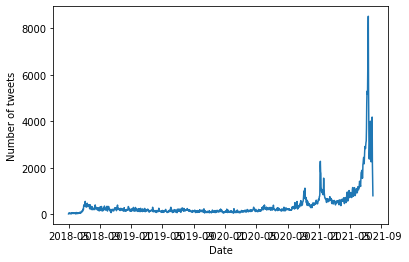

In [ ]:
largest_comm=max(comms, key=lambda coll: len(coll))
len(largest_comm) #6744 users 

tweets_largest_community=df_tweets[df_tweets['user_id'].isin(largest_comm)]
len(tweets_largest_community) #496008 tweets

# Get tweets for particular dates:
def get_tweets(start_date,end_date,df):
  return(df[(df['time']>=start_date)&(df['time']<=end_date)])

begin = '2021-01-01'
begin='2018-05-01'
end = '2021-07-31'
start_date = datetime.datetime.strptime(begin, '%Y-%m-%d')
end_date = datetime.datetime.strptime(end, '%Y-%m-%d')
df_largest_comm_tweets=get_tweets(start_date,end_date,tweets_largest_community)
len(df_largest_comm_tweets) #434859

#get the number of tweets per day:
from collections import Counter
tweets_per_day=dict(Counter(list(df_largest_comm_tweets['time'])))
sorted_dict=dict(sorted(tweets_per_day.items()))
import matplotlib.pyplot as plt
plt.plot(list(sorted_dict.keys()),list(sorted_dict.values()))
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.show()



Text(0, 0.5, 'Proportion of surprise tweets in 30 day period after the date')

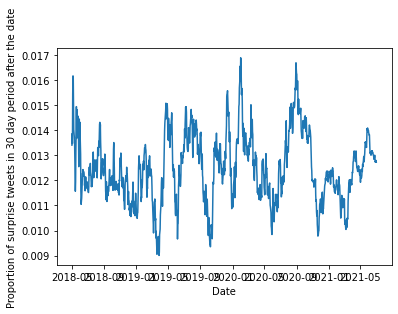

In [ ]:
#Analyse emotion change of the largest community:
date_emotion=df_largest_comm_tweets[['time','emotion']]
date_emotion
dates=list(date_emotion['time'])
emotions=list(date_emotion['emotion'])
emotions
from collections import Counter
Counter(emotions)
import datetime
dates_in_dateform=dates
emotion_per_date=pd.DataFrame({'emotion':emotions,'date':dates_in_dateform},columns=['emotion','date'])

begin = '2021-01-01'
begin='2018-05-01'
end = '2021-07-31'
dt_start = datetime.datetime.strptime(begin, '%Y-%m-%d')
dt_end = datetime.datetime.strptime(end, '%Y-%m-%d')
n_days =(dt_end - dt_start).days
sliding_window=dict()
for i in range(n_days-30):
  begin=dt_start+datetime.timedelta(days = i)
  end=begin+datetime.timedelta(days = 30)
  emotions_in_period=emotion_per_date[(emotion_per_date['date']>=begin)&(emotion_per_date['date']<=end)]
  emotions=list(emotions_in_period['emotion'])
  sliding_window[begin]=emotions

emotions_per_window=dict()
from collections import Counter
for i in sliding_window.keys():
  emotions_dict=dict(Counter(sliding_window[i]))
  #dict_you_want = { your_key: emotions_dict[your_key] for your_key in ['joy','fear','sadness','anger','love','surprise']}
  #emotions_per_window[i]=dict_you_want
  emotions_per_window[i]=emotions_dict
#emotions_per_window

fear_per_window=dict()
anger_per_window=dict()
joy_per_window=dict()
sadness_per_window=dict()
love_per_window=dict()
surprise_per_window=dict()
for i in emotions_per_window.keys():
  if 'fear' in emotions_per_window[i].keys():
    fear_per_window[i]=emotions_per_window[i]['fear']/sum(emotions_per_window[i].values())
  if 'anger' in emotions_per_window[i].keys():
    anger_per_window[i]=emotions_per_window[i]['anger']/sum(emotions_per_window[i].values())
  if 'joy' in emotions_per_window[i].keys():
    joy_per_window[i]=emotions_per_window[i]['joy']/sum(emotions_per_window[i].values())
  if 'sadness' in emotions_per_window[i].keys():
    sadness_per_window[i]=emotions_per_window[i]['sadness']/sum(emotions_per_window[i].values())
  if 'love' in emotions_per_window[i].keys():
    love_per_window[i]=emotions_per_window[i]['love']/sum(emotions_per_window[i].values())
  if 'surprise' in emotions_per_window[i].keys():
    surprise_per_window[i]=emotions_per_window[i]['surprise']/sum(emotions_per_window[i].values())
fear_per_window
plt.plot(list(fear_per_window.keys()),list(fear_per_window.values()),label='fear')
plt.xlabel('Date')
plt.ylabel('Proportion of fear tweets in 30 day period after the date')
anger_per_window
plt.plot(list(anger_per_window.keys()),list(anger_per_window.values()),label='anger')
plt.xlabel('Date')
plt.ylabel('Proportion of anger tweets in 30 day period after the date')
joy_per_window
plt.plot(list(joy_per_window.keys()),list(joy_per_window.values()),label='joy')
plt.xlabel('Date')
plt.ylabel('Proportion of joy tweets in 30 day period after the date')
sadness_per_window
plt.plot(list(sadness_per_window.keys()),list(sadness_per_window.values()),label='sadness')
plt.xlabel('Date')
plt.ylabel('Proportion of sadness tweets in 30 day period after the date')
love_per_window
plt.plot(list(love_per_window.keys()),list(love_per_window.values()),label='love')
plt.xlabel('Date')
plt.ylabel('Proportion of love tweets in 30 day period after the date')
surprise_per_window
plt.plot(list(surprise_per_window.keys()),list(surprise_per_window.values()),label='surprise')
plt.xlabel('Date')
plt.ylabel('Proportion of surprise tweets in 30 day period after the date')
plt.ylabel('Proportion of tweets with different emotion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


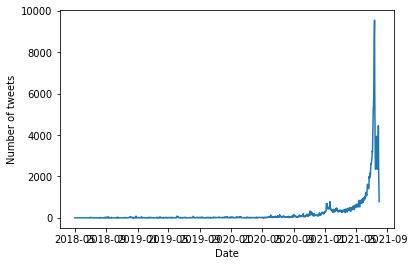

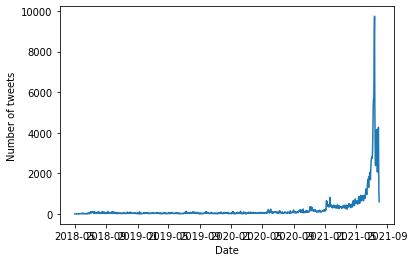

In [ ]:
#get community lengths:
comm_lengths=[len(communities) for communities in comms]
comm_lengths
second_largest=[c for c in comms if len(c)==3803][0]
third_largest=[c for c in comms if len(c)==3468][0]

tweets_s_largest_community=df_tweets[df_tweets['user_id'].isin(second_largest)]
#len(tweetss_s_largest_community)

tweets_t_largest_community=df_tweets[df_tweets['user_id'].isin(third_largest)]
#len(tweetss_t_largest_community) 

# Get tweets for particular dates:
def get_tweets(start_date,end_date,df):
  return(df[(df['time']>=start_date)&(df['time']<=end_date)])

begin = '2021-01-01'
begin='2018-05-01'
end = '2021-07-31'
start_date = datetime.datetime.strptime(begin, '%Y-%m-%d')
end_date = datetime.datetime.strptime(end, '%Y-%m-%d')
df_s_largest_comm_tweets=get_tweets(start_date,end_date,tweets_s_largest_community)
df_t_largest_comm_tweets=get_tweets(start_date,end_date,tweets_t_largest_community)
#len(df_largest_comm_tweets) #434859

#get the number of tweets per day:
from collections import Counter
tweets_per_day_s=dict(Counter(list(df_s_largest_comm_tweets['time'])))
tweets_per_day_t=dict(Counter(list(df_t_largest_comm_tweets['time'])))
sorted_dict_s=dict(sorted(tweets_per_day_s.items()))
sorted_dict_t=dict(sorted(tweets_per_day_t.items()))
import matplotlib.pyplot as plt
plt.plot(list(sorted_dict_s.keys()),list(sorted_dict_s.values()))
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.show()

plt.plot(list(sorted_dict_t.keys()),list(sorted_dict_t.values()))
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.show()


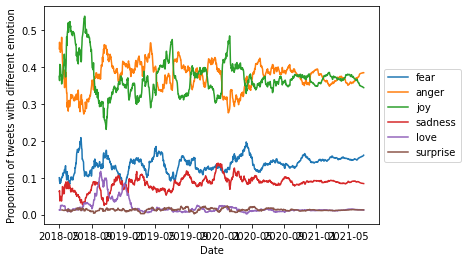

In [ ]:
#Analyse emotion change of the largest community:
date_emotion_s=df_s_largest_comm_tweets[['time','emotion']]
date_emotion_t=df_t_largest_comm_tweets[['time','emotion']]
dates_s=list(date_emotion_s['time'])
emotions_s=list(date_emotion_s['emotion'])

dates_t=list(date_emotion_t['time'])
emotions_t=list(date_emotion_t['emotion'])

from collections import Counter
Counter(emotions_s)
import datetime
dates_in_dateform_s=dates_s
emotion_per_date_s=pd.DataFrame({'emotion':emotions_s,'date':dates_in_dateform_s},columns=['emotion','date'])

dates_in_dateform_t=dates_t
emotion_per_date_t=pd.DataFrame({'emotion':emotions_t,'date':dates_in_dateform_t},columns=['emotion','date'])

begin = '2021-01-01'
begin='2018-05-01'
end = '2021-07-31'
dt_start = datetime.datetime.strptime(begin, '%Y-%m-%d')
dt_end = datetime.datetime.strptime(end, '%Y-%m-%d')
n_days =(dt_end - dt_start).days
sliding_window_s=dict()
sliding_window_t=dict()
for i in range(n_days-30):
  begin=dt_start+datetime.timedelta(days = i)
  end=begin+datetime.timedelta(days = 30)
  emotions_in_period_s=emotion_per_date_s[(emotion_per_date_s['date']>=begin)&(emotion_per_date_s['date']<=end)]
  emotions=list(emotions_in_period_s['emotion'])
  sliding_window_s[begin]=emotions
  emotions_in_period_t=emotion_per_date_t[(emotion_per_date_t['date']>=begin)&(emotion_per_date_t['date']<=end)]
  emotions=list(emotions_in_period_t['emotion'])
  sliding_window_t[begin]=emotions

emotions_per_window_s=dict()
from collections import Counter
for i in sliding_window_s.keys():
  emotions_dict_s=dict(Counter(sliding_window_s[i]))
  #dict_you_want = { your_key: emotions_dict[your_key] for your_key in ['joy','fear','sadness','anger','love','surprise']}
  #emotions_per_window[i]=dict_you_want
  emotions_per_window_s[i]=emotions_dict_s
#emotions_per_window
emotions_per_window_t=dict()
from collections import Counter
for i in sliding_window_t.keys():
  emotions_dict_t=dict(Counter(sliding_window_t[i]))
  #dict_you_want = { your_key: emotions_dict[your_key] for your_key in ['joy','fear','sadness','anger','love','surprise']}
  #emotions_per_window[i]=dict_you_want
  emotions_per_window_t[i]=emotions_dict_t



emotions_per_window=emotions_per_window_s
fear_per_window=dict()
anger_per_window=dict()
joy_per_window=dict()
sadness_per_window=dict()
love_per_window=dict()
surprise_per_window=dict()
for i in emotions_per_window.keys():
  if 'fear' in emotions_per_window_s[i].keys():
    fear_per_window[i]=emotions_per_window[i]['fear']/sum(emotions_per_window[i].values())
  if 'anger' in emotions_per_window[i].keys():
    anger_per_window[i]=emotions_per_window[i]['anger']/sum(emotions_per_window[i].values())
  if 'joy' in emotions_per_window[i].keys():
    joy_per_window[i]=emotions_per_window[i]['joy']/sum(emotions_per_window[i].values())
  if 'sadness' in emotions_per_window[i].keys():
    sadness_per_window[i]=emotions_per_window[i]['sadness']/sum(emotions_per_window[i].values())
  if 'love' in emotions_per_window[i].keys():
    love_per_window[i]=emotions_per_window[i]['love']/sum(emotions_per_window[i].values())
  if 'surprise' in emotions_per_window[i].keys():
    surprise_per_window[i]=emotions_per_window[i]['surprise']/sum(emotions_per_window[i].values())
fear_per_window
plt.plot(list(fear_per_window.keys()),list(fear_per_window.values()),label='fear')
plt.xlabel('Date')
plt.ylabel('Proportion of fear tweets in 30 day period after the date')
anger_per_window
plt.plot(list(anger_per_window.keys()),list(anger_per_window.values()),label='anger')
plt.xlabel('Date')
plt.ylabel('Proportion of anger tweets in 30 day period after the date')
joy_per_window
plt.plot(list(joy_per_window.keys()),list(joy_per_window.values()),label='joy')
plt.xlabel('Date')
plt.ylabel('Proportion of joy tweets in 30 day period after the date')
sadness_per_window
plt.plot(list(sadness_per_window.keys()),list(sadness_per_window.values()),label='sadness')
plt.xlabel('Date')
plt.ylabel('Proportion of sadness tweets in 30 day period after the date')
love_per_window
plt.plot(list(love_per_window.keys()),list(love_per_window.values()),label='love')
plt.xlabel('Date')
plt.ylabel('Proportion of love tweets in 30 day period after the date')
surprise_per_window
plt.plot(list(surprise_per_window.keys()),list(surprise_per_window.values()),label='surprise')
plt.xlabel('Date')
plt.ylabel('Proportion of surprise tweets in 30 day period after the date')
plt.ylabel('Proportion of tweets with different emotion')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Sentiment analysis
It first breaks up sentences into clauses (using punctuation and complementizers as separators), and then for each keyword, its score is the average of the vader score of all clauses where it appears.

In [ ]:
import glob, json, zipfile, os, csv, re, nltk

import pandas as pd
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import copy as cp
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet') 
nltk.download('vader_lexicon')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from tqdm.notebook import tqdm as tq
tq.pandas()
import gensim.corpora as corpora
from gensim.models import CoherenceModel, LdaMulticore
from gensim.utils import simple_preprocess 
import gensim.corpora as corpora
from google.colab import files
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def vaderScore(text):
  return analyzer.polarity_scores(text)['compound']

def posTagging(text):
  return nltk.pos_tag(nltk.word_tokenize(text))

def avg(list): 
    return sum(list)/len(list) if len(list)!=0 else 0

clauseDelimeters = ['CC','.','!','?',','] # complementizers and punctuations. 

def sentimentScore(text, aspects):
  tokens = posTagging(text)
  scores = {word: [] for word in aspects} 
      # ALT: just sum scores and divide by total number of clauses
  
  clause = []
  flag = False

  for (word,pos) in tokens:
    # print(pos)
    if pos in clauseDelimeters: # updated logic to include punctuation at the end
      flag = True
    elif flag: # the first word after a delimeter, i.e. first word of new clause
      flag = False
      # process the clause
      clauseText = ' '.join(clause)
      # print(clauseText)
      clauseScore = vaderScore(clauseText)
      for aspect in aspects:
        if aspect in clause:
          scores[aspect].append(clauseScore)
      clause = []
    else:
      flag = False

    # clause.append(word)
    if pos != 'CC':
      clause.append(word) # exclude complementizers but include punctuations

  if len(clause)!=0: # handle the last clause--end of sentence
    clauseText = ' '.join(clause)
    # print(clauseText)
    clauseScore = vaderScore(clauseText)
    for aspect in aspects:
      if aspect in clause:
        scores[aspect].append(clauseScore) 
    
  return {word: avg(scores[word]) for word in aspects}


#print("----------Calculating Vader Sentiment Scores-----------")
#tweets_df['sentiment_score'] = tweets_df.progress_apply(lambda x : vaderScore(x['text']), axis=1)
#print("----------Calculating ASBA Sentiment Dictionaries----------")
#tweets_df['sentiment_dict'] = tweets_df.progress_apply(lambda x : sentimentScore(x['text'], x['keywords']), axis=1)

In [ ]:
path = 'drive/MyDrive/Knowledge Graphs 2022/data/'
import pandas as pd
df_tweets_full=pd.read_csv(path+'tweets_w_all_info.csv')

In [ ]:
print("----------Calculating Vader Sentiment Scores-----------")
df_tweets_full['sentiment_score'] = df_tweets_full.progress_apply(lambda x : vaderScore(x['text']), axis=1)

----------Calculating Vader Sentiment Scores-----------


  0%|          | 0/923385 [00:00<?, ?it/s]

In [ ]:
df_tweets_full.to_csv(path+'df_tweets_sentiment_scores.csv', index=False, header=True)

#Time series sentiment analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/MyDrive/Knowledge Graphs 2022/data/'
import pandas as pd
df_tweets_full=pd.read_csv(path+'tweets_w_recovered_50_topics.csv')
len(df_tweets_full) #923385
df_tweets=df_tweets_full[df_tweets_full['cleaned_text']!='[]']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(array([736938., 737060., 737180., 737303., 737425., 737546., 737669.,
        737791., 737911., 738034.]),
 <a list of 10 Text major ticklabel objects>)

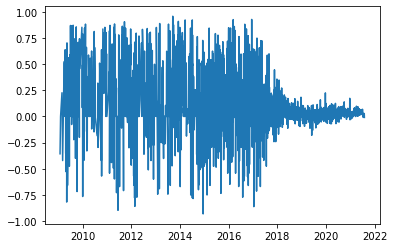

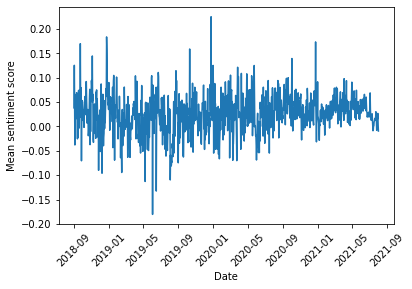

In [ ]:
df_sentiment_scores=pd.read_csv(path+'df_tweets_sentiment_scores.csv')
#transform the time:
import datetime
dates_in_dateform=list()
for date in list(df_sentiment_scores['time']):
  d=datetime.datetime.strptime(date, '%a %b %d %H:%M:%S %z %Y').strftime('%b %d %Y')
  dates_in_dateform.append(datetime.datetime.strptime(d,'%b %d %Y'))
#len(dates_in_dateform)
#len(df_tweets)
df_sentiment_scores['time']=dates_in_dateform

######## Get the sentiment scores at each time:
dict_sentiment_per_time=dict()
for time in set(dates_in_dateform):
  dict_sentiment_per_time[time]=list(df_sentiment_scores[df_sentiment_scores['time']==time]['sentiment_score'])

###### Get the mean sentiment score per day:
import numpy as np
for time in dict_sentiment_per_time.keys():
  dict_sentiment_per_time[time]=np.mean(dict_sentiment_per_time[time])

dict_sentiment_per_time=dict(sorted(dict_sentiment_per_time.items()))

dates=list(dict_sentiment_per_time.keys())
sentiment_scores=list(dict_sentiment_per_time.values())
import matplotlib.pyplot as plt
plt.plot(dates,sentiment_scores)
#Take only data after 2018:
d = dict((k, v) for k, v in dict_sentiment_per_time.items() if k >= datetime.datetime(2018,9,1))

dates=list(d.keys())
sentiment_scores=list(d.values())
plt.figure()
plt.plot(dates,sentiment_scores)
plt.xlabel('Date')
plt.ylabel('Mean sentiment score')
plt.xticks(rotation=45)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 998 kB 26.6 MB/s 
Change points:  [datetime.datetime(2019, 1, 28, 0, 0), datetime.datetime(2020, 7, 31, 0, 0), datetime.datetime(2021, 7, 6, 0, 0), datetime.datetime(2021, 8, 2, 0, 0)]


(array([736938., 737060., 737180., 737303., 737425., 737546., 737669.,
        737791., 737911., 738034.]),
 <a list of 10 Text major ticklabel objects>)

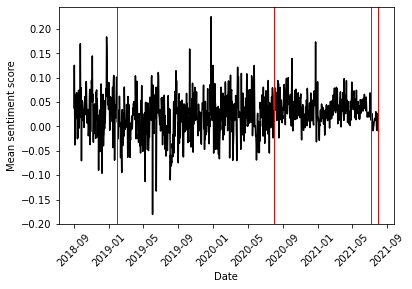

In [ ]:
##### Do change point detection on this:
! pip install ruptures
import ruptures as rpt

#Changepoint detection with the Pelt search method
#model="rbf"
mean_sentiment=np.array(sentiment_scores)
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(mean_sentiment)
result = algo.predict(n_bkps=3)
sorted_dates=dates
plt.figure()
plt.plot(sorted_dates, mean_sentiment,color='black')
print("Change points: ", [sorted_dates[i-1] for i in result]) 
for r in result:
    plt.axvline(x=sorted_dates[r-1], color = 'red', linewidth = 1)
plt.xlabel('Date')
plt.ylabel('Mean sentiment score')
plt.xticks(rotation=45)

(array([736938., 737060., 737180., 737303., 737425., 737546., 737669.,
        737791., 737911., 738034.]),
 <a list of 10 Text major ticklabel objects>)

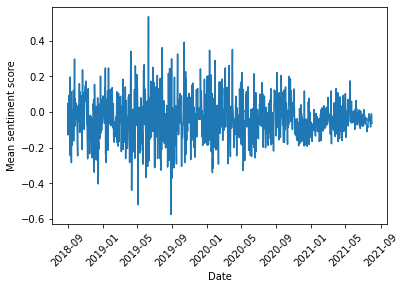

In [ ]:
# Do for specific topic:
def get_sentiment_dictionary_per_topic(i):
  tweets_with_topic=list(df_tweets[df_tweets['topic']==i]['id'])
  df=df_sentiment_scores[df_sentiment_scores['id'].isin(tweets_with_topic)]
  dict_sentiment_per_time=dict()
  for time in set(df['time']):
    dict_sentiment_per_time[time]=list(df[df['time']==time]['sentiment_score'])
  for time in dict_sentiment_per_time.keys():
    dict_sentiment_per_time[time]=np.mean(dict_sentiment_per_time[time])
  dict_sentiment_per_time=dict(sorted(dict_sentiment_per_time.items()))
  return(dict_sentiment_per_time)

d=get_sentiment_dictionary_per_topic(0)
#get data after date:

#Take only data after 2018:
d = dict((k, v) for k, v in d.items() if k >= datetime.datetime(2018,9,1))

dates=list(d.keys())
sentiment_scores=list(d.values())
plt.plot(dates,sentiment_scores)
plt.xlabel('Date')
plt.ylabel('Mean sentiment score')
plt.xticks(rotation=45)

(array([736938., 737060., 737180., 737303., 737425., 737546., 737669.,
        737791., 737911., 738034.]),
 <a list of 10 Text major ticklabel objects>)

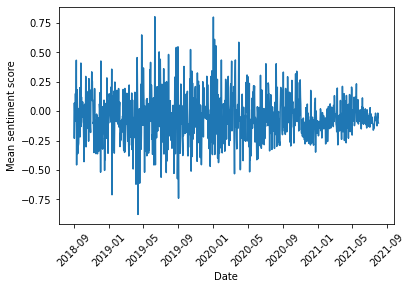

In [ ]:
#Remove the tweets with sentiment topic 0:
df_sentiment_scores=df_sentiment_scores[df_sentiment_scores['sentiment_score']!=0]
d=get_sentiment_dictionary_per_topic(0) #trump
#d=get_sentiment_dictionary_per_topic(93) #epstein

#get data after date:

#Take only data after 2018:
d = dict((k, v) for k, v in d.items() if k >= datetime.datetime(2018,9,1))

dates=list(d.keys())
sentiment_scores=list(d.values())
plt.plot(dates,sentiment_scores)
plt.xlabel('Date')
plt.ylabel('Mean sentiment score')
plt.xticks(rotation=45)
#np.mean(sentiment_scores) #0.44 for trump, -0.159 for epstein


In [ ]:
#Get mean sentiment per topic:
import numpy as np
mean_sentiment_per_topic=list()
for i in range(199):
  d=get_sentiment_dictionary_per_topic(i)
  mean_sentiment_per_topic.append(np.mean(list(d.values())))

plt.figure()
plt.bar([i for i in range(199)],mean_sentiment_per_topic)
plt.show()

#get 5 topics with highest sentiment score:
dict_sentiment_per_topic=dict()
for i in range(199):
  dict_sentiment_per_topic[i]=mean_sentiment_per_topic[i]

#dict_sentiment_per_topic[2] #-0.10825177767722315 is the mean sentiment for president/biden topic
dict_sentiment_per_topic[1] #-0.06978952208623604 for vaccine topic
import operator
sorted_x = sorted(dict_sentiment_per_topic.items(), key=operator.itemgetter(1))

#sorted_x

#Top 5 topics with highest mean sentiment score: 
sorted_x[-5:] #19,75,56,25,165
#19: ['awesome', 'omg', 'amazing', 'yay', 'looks', 'kidding', 'fantastic', 'quote', 'great', 'delicious']
#25: ['birthday', 'happy', 'anniversary', 'day', 'happiness', 'thanksgiving', 'bday', 'blessed', 'birthdays', 'alone']
#56: ['love', 'cool', 'amy', 'this', 'stunning', 'president', 'piers', 'barrett', 'em', 'coney']
#75: ['beautiful', 'sweet', 'gorgeous', 'lovely', 'beauty', 'accident', 'date', 'dreams', 'dating', 'famous']
#165: ['love', 'joy', 'bright', 'it', 'ethan', 'freudian', 'you', 'jesse', 'slip', 'everyday']


#5 topics with lowest mean sentiment score:
sorted_x[:5] #28,161,49,41,157
#28:['die', 'und', 'ich', 'das', 'ist', 'der', 'nicht', 'ja', 'zu', 'auch']
#161: ['unfollowed', 'tracked', 'today', 'me', 'people', 'by', 'profilingyour', 'friendsyou', 'profiled', 'registry']
#49: ['fraud', 'election', 'voter', 'fair', 'fraudulent', 'integrity', 'elections', 'frauds', 'evidence', 'consequences']
#41: ['gun', 'guns', 'shooting', 'crime', 'nra', 'criminals', 'vegas', 'ammo', 'ar', 'mass'] ##### look at this 
#157: ['sick', 'ugh', 'really', 'woot', 'puke', 'society', 'woohoo', 'woof', 'poop', 'again']

KeyboardInterrupt: ignored

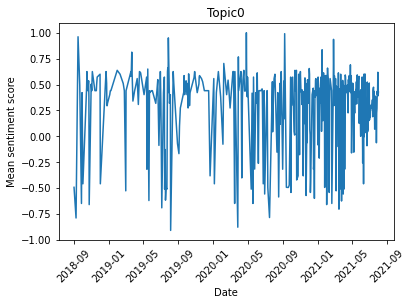

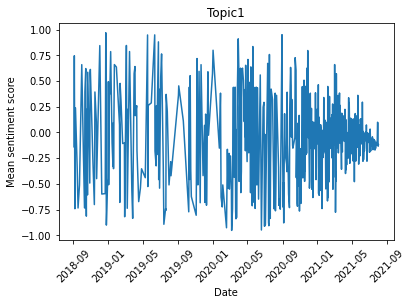

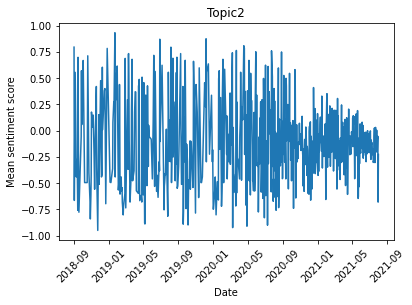

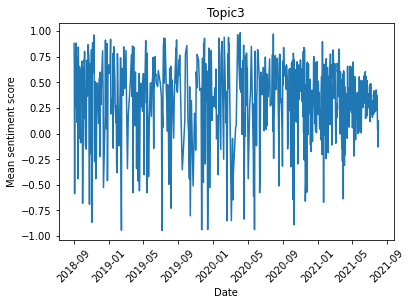

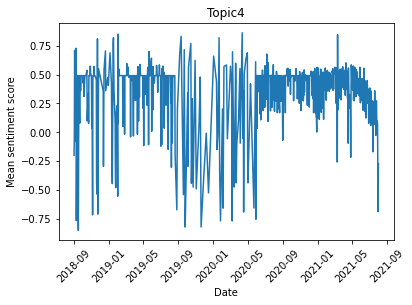

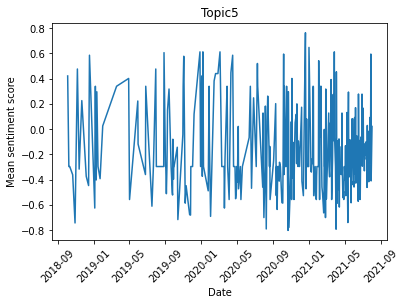

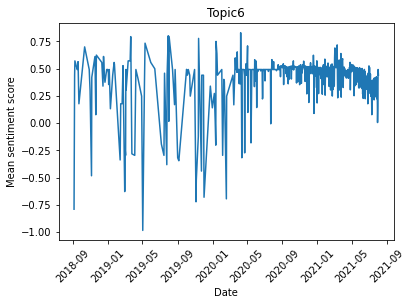

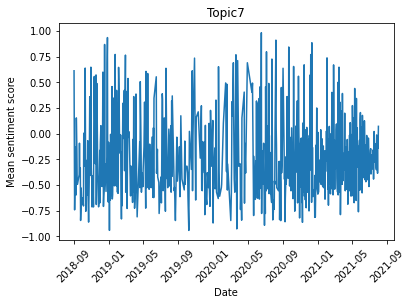

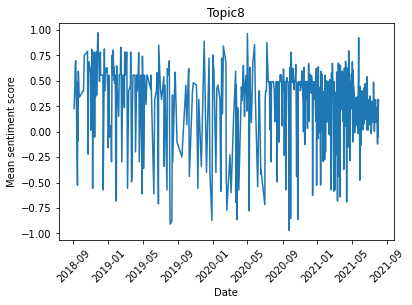

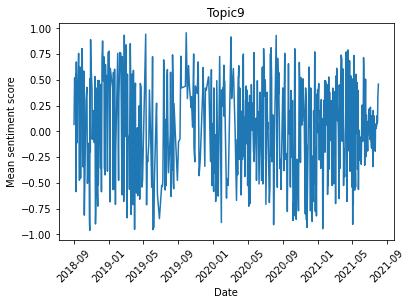

In [ ]:
#plot for all topics:
for i in range(10):
  d=get_sentiment_dictionary_per_topic(i)
#Take only data after 2018:
  d = dict((k, v) for k, v in d.items() if k >= datetime.datetime(2018,9,1))

  dates=list(d.keys())
  sentiment_scores=list(d.values())
  plt.figure()
  plt.plot(dates,sentiment_scores)
  plt.xlabel('Date')
  plt.ylabel('Mean sentiment score')
  plt.title('Topic'+str(i))
  plt.xticks(rotation=45)
  plt.show()

#Sliding window technique to see more details

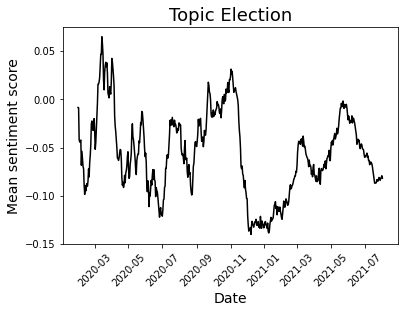

In [ ]:
import numpy as np
d=get_sentiment_dictionary_per_topic(0)
d = dict((k, v) for k, v in d.items() if k >= datetime.datetime(2020,1,1))
dates=list(d.keys())
sentiment_scores=list(d.values())
mean_sentiment=[np.mean(sentiment_scores[i:i+30]) for i in range(len(sentiment_scores)-30)]
#len(mean_sentiment)
dates=dates[30:]
#len(dates)

np.mean(mean_sentiment)

plt.figure()
plt.plot(dates,mean_sentiment,color='black')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Mean sentiment score',fontsize=14)
plt.title('Topic Election',fontsize=18)
plt.xticks(rotation=45,fontsize=10)
plt.savefig('drive/MyDrive/Knowledge Graphs 2022/data/re_time_series4.pdf',bbox_inches='tight')
plt.show()





Change points:  [Timestamp('2020-09-17 00:00:00'), Timestamp('2020-11-21 00:00:00'), Timestamp('2021-02-19 00:00:00'), Timestamp('2021-08-02 00:00:00')]


Text(0.5, 1.0, 'Topic Election')

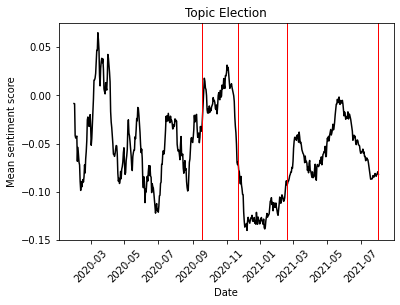

In [ ]:
#Do change point detection:
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(np.array(mean_sentiment))
result = algo.predict(n_bkps=3)
sorted_dates=dates
plt.figure()
plt.plot(sorted_dates, mean_sentiment,color='black')
print("Change points: ", [sorted_dates[i-1] for i in result]) 
for r in result:
    plt.axvline(x=sorted_dates[r-1], color = 'red', linewidth = 1)
plt.xlabel('Date')
plt.ylabel('Mean sentiment score')
plt.xticks(rotation=45)
plt.title('Topic Election')

In [ ]:
#Investigate tweets ub the period 2019-09 and 2020-01:
df_tweets=pd.read_csv(path+'tweets_w_recovered_50_topics.csv')
len(df_tweets) #923385
df_tweets=df_tweets[df_tweets['cleaned_text']!='[]']
dates_in_dateform=list()
for date in list(df_tweets['time']):
  d=datetime.datetime.strptime(date, '%a %b %d %H:%M:%S %z %Y').strftime('%b %d %Y')
  dates_in_dateform.append(datetime.datetime.strptime(d,'%b %d %Y'))
#len(dates_in_dateform)
#len(df_tweets)
df_tweets['time']=dates_in_dateform
tweets_with_topic_president=df_tweets[df_tweets['topic']==0] 
tweets_with_topic_president_needed=tweets_with_topic_president[(tweets_with_topic_president['time']>=datetime.datetime(2019,9,1))&(tweets_with_topic_president['time']<=datetime.datetime(2020,1,1))]
tweets_with_topic_president_needed2=tweets_with_topic_president[(tweets_with_topic_president['time']>=datetime.datetime(2018,12,1))&(tweets_with_topic_president['time']<=datetime.datetime(2019,2,1))]
texts_needed=list(tweets_with_topic_president_needed2['text'])
for i in texts_needed:
  print(i)

@SenSchumer @SpeakerPelosi #ShumerPelosiShutdown You are not the BOSS of US. WE THE PEOPLE R YOUR BOSS. 93% Americans think there is a problem with illegal immigration. Fund it NOW! #StopResisting
#TIMEOUTFTW #timeouttovote #coachbradbrownell
OnePlus 6T international giveaway @androidauth #giveaway https://t.co/vGUAteACU1
Google Pixel 3 XL international giveaway! https://t.co/rvTy11l8SC
#timeouttovote#coachbradbrownell
Google Pixel 3 international giveaway! https://t.co/vIAef1Uebb
@ForeignPolicy @JamesTraub1 Has done to institutions
@realDonaldTrump Except for federal workers
@TheLastRefuge2 @RepMarkMeadows As much as I love your instincts in most areas, I think you are off on this one Sundance.   The committee was PISSED because they don't have the information.   This was nothing but a stunt by rhinos and dems to try to learn what is going on behind the scenes.  They are scared.
@KenPaxtonTX @TXsecofstate Why can't they do that for California??
@StateDeputySPOX @betsyannrealno2 Lol,, 

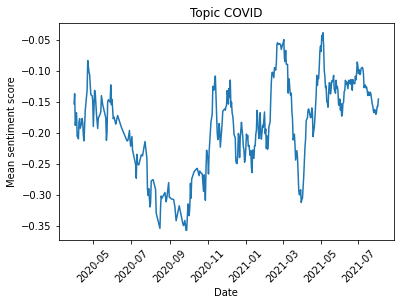

In [ ]:
#Do for topic protests:
import numpy as np
d=get_sentiment_dictionary_per_topic(5)
d = dict((k, v) for k, v in d.items() if k >= datetime.datetime(2020,1,1))
dates=list(d.keys())
sentiment_scores=list(d.values())
mean_sentiment=[np.mean(sentiment_scores[i:i+30]) for i in range(len(sentiment_scores)-30)]
#len(mean_sentiment)
dates=dates[30:]
#len(dates)

plt.figure()
plt.plot(dates,mean_sentiment)
plt.xlabel('Date')
plt.ylabel('Mean sentiment score')
plt.title('Topic COVID')
plt.xticks(rotation=45)
plt.show()

Change points:  [Timestamp('2020-07-03 00:00:00'), Timestamp('2020-10-29 00:00:00'), Timestamp('2021-02-10 00:00:00'), Timestamp('2021-08-02 00:00:00')]


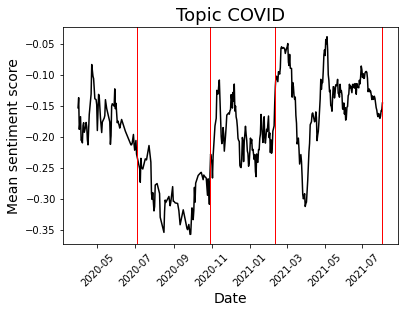

In [ ]:
#Topic election and fraud
d=get_sentiment_dictionary_per_topic(5)
d = dict((k, v) for k, v in d.items() if k >= datetime.datetime(2020,1,1))
dates=list(d.keys())
sentiment_scores=list(d.values())
mean_sentiment=[np.mean(sentiment_scores[i:i+30]) for i in range(len(sentiment_scores)-30)]
#len(mean_sentiment)
dates=dates[30:]
#len(dates)

model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(np.array(mean_sentiment))
result = algo.predict(n_bkps=3)
sorted_dates=dates
plt.figure()
plt.plot(sorted_dates, mean_sentiment,color='black')
print("Change points: ", [sorted_dates[i-1] for i in result]) 
for r in result:
    plt.axvline(x=sorted_dates[r-1], color = 'red', linewidth = 1)

# plt.figure()
# plt.plot(dates,mean_sentiment,color='black')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Mean sentiment score',fontsize=14)
plt.title('Topic COVID',fontsize=18)
plt.xticks(rotation=45,fontsize=10)
# plt.savefig('drive/MyDrive/Knowledge Graphs 2022/data/re_time_series5.pdf',bbox_inches='tight')
plt.show()

In [ ]:
tweets_with_topic_president=df_tweets[df_tweets['topic']==27] 
tweets_with_topic_president_needed=tweets_with_topic_president[(tweets_with_topic_president['time']>=datetime.datetime(2021,4,1))&(tweets_with_topic_president['time']<=datetime.datetime(2021,6,1))]
texts_needed=list(tweets_with_topic_president_needed['text'])
for i in texts_needed:
  print(i)

@PaigeSpiranac @SamanthaSMarks This is more and likely a case of one person's opinion about golf etiquette. If everyone showed up with t-shirts to that course one day, they would change the rules vs lost green fees.
@Ceyx54 @GovParsonMO .......for continuing what Trump set in motion!

- there, finished it for ya!!
Statement by Donald J. Trump, 45th President of the United States of America https://t.co/vW8RsEuEWd
@Blackstonecomms @RealBrysonGray No.  But I can’t see Trump allowing all that to happen just because ppl are ignorant of what is going on. Trust the plan.  Right?
@RepLizCheney What did you think would happen when you abandoned Trump, you moron.
@DonaldJTrumpJr Oh yes Evan a blind guy could see a huge difference here   What we need is the real President Donald J Trump back at the head of the world like it should be that’s what we voted for
@realTuckFrumper He’s still playing golf. What’s the difference?
@redsteeze Wait one darn minute, Trump was asked about someone in his admi

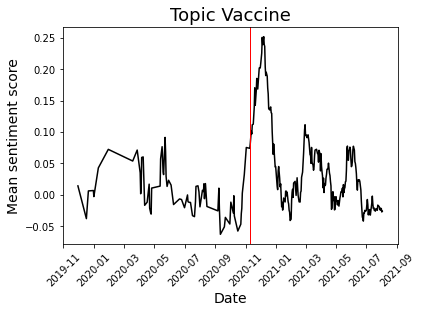

In [ ]:
#Topic democrats
d=get_sentiment_dictionary_per_topic(4)
d = dict((k, v) for k, v in d.items() if k >= datetime.datetime(2019,1,1))
dates=list(d.keys())
sentiment_scores=list(d.values())
mean_sentiment=[np.mean(sentiment_scores[i:i+30]) for i in range(len(sentiment_scores)-30)]
#len(mean_sentiment)
dates=dates[30:]
#len(dates)

plt.figure()
plt.plot(dates,mean_sentiment,color='black')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Mean sentiment score',fontsize=14)
plt.title('Topic Vaccine',fontsize=18)
plt.xticks(rotation=45,fontsize=10)
plt.axvline(x=datetime.datetime(2020, 11, 9), color = 'red', linewidth = 1)
# plt.savefig('drive/MyDrive/Knowledge Graphs 2022/data/time_series6.pdf',bbox_inches='tight')
plt.show()

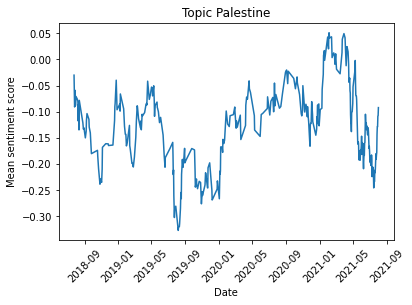

In [ ]:
#Topic Palestine
d=get_sentiment_dictionary_per_topic(60)
dates=list(d.keys())
sentiment_scores=list(d.values())
mean_sentiment=[np.mean(sentiment_scores[i:i+30]) for i in range(len(sentiment_scores)-30)]
#len(mean_sentiment)
dates=dates[30:]
#len(dates)

plt.figure()
plt.plot(dates,mean_sentiment)
plt.xlabel('Date')
plt.ylabel('Mean sentiment score')
plt.title('Topic Palestine')
plt.xticks(rotation=45)
plt.show()

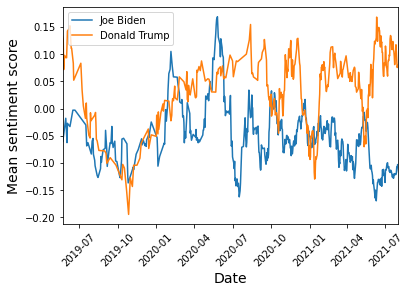

In [ ]:
start_date = datetime.datetime(2019,1,1)
d=get_sentiment_dictionary_per_topic(1)
d = dict((k, v) for k, v in d.items() if k >= start_date)
dates=list(d.keys())
sentiment_scores=list(d.values())
mean_sentiment=[np.mean(sentiment_scores[i:i+30]) for i in range(len(sentiment_scores)-30)]
#len(mean_sentiment)
dates=dates[30:]
dates_1 = dates
#len(dates)

plt.figure()
plt.plot(dates,mean_sentiment, label='Joe Biden')

d=get_sentiment_dictionary_per_topic(27)
d = dict((k, v) for k, v in d.items() if k >= start_date)
dates=list(d.keys())
sentiment_scores=list(d.values())
mean_sentiment=[np.mean(sentiment_scores[i:i+30]) for i in range(len(sentiment_scores)-30)]
#len(mean_sentiment)
dates=dates[30:]
plt.plot(dates,mean_sentiment, label='Donald Trump')

plt.xlabel('Date',fontsize=14)
plt.ylabel('Mean sentiment score',fontsize=14)
plt.xticks(rotation=45,fontsize=10)
plt.xlim([max(min(dates), min(dates_1)), min(max(dates), max(dates_1))])
# https://www.theguardian.com/world/2020/may/28/joe-biden-donald-trump-coronavirus-death-toll
# plt.axvline(x=datetime.datetime(2020, 5, 27), color = 'cyan', linewidth = 1)
# plt.axvline(x=datetime.datetime(2021, 5, 10), color = 'cyan', linewidth = 1)
plt.legend()
plt.savefig('drive/MyDrive/Knowledge Graphs 2022/data/time_series_sentiment_1.pdf',bbox_inches='tight')
plt.show()

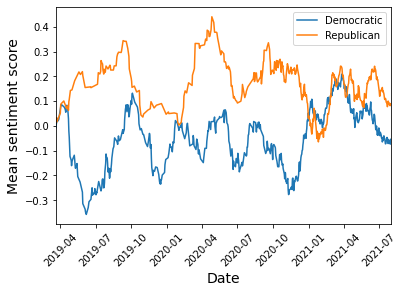

In [ ]:
d=get_sentiment_dictionary_per_topic(9)
d = dict((k, v) for k, v in d.items() if k >= datetime.datetime(2019,1,1))
dates=list(d.keys())
sentiment_scores=list(d.values())
mean_sentiment=[np.mean(sentiment_scores[i:i+30]) for i in range(len(sentiment_scores)-30)]
#len(mean_sentiment)
dates=dates[30:]
dates_1 = dates
#len(dates)

plt.figure()
plt.plot(dates,mean_sentiment, label='Democratic')

d=get_sentiment_dictionary_per_topic(15)
d = dict((k, v) for k, v in d.items() if k >= datetime.datetime(2019,1,1))
dates=list(d.keys())
sentiment_scores=list(d.values())
mean_sentiment=[np.mean(sentiment_scores[i:i+30]) for i in range(len(sentiment_scores)-30)]
#len(mean_sentiment)
dates=dates[30:]
plt.plot(dates,mean_sentiment, label='Republican')

plt.xlabel('Date',fontsize=14)
plt.ylabel('Mean sentiment score',fontsize=14)
plt.xticks(rotation=45,fontsize=10)
plt.xlim([max(min(dates), min(dates_1)), min(max(dates), max(dates_1))])
# plt.axvline(x=datetime.datetime(2020, 5, 27), color = 'cyan', linewidth = 1)
# plt.axvline(x=datetime.datetime(2021, 5, 10), color = 'cyan', linewidth = 1)
plt.legend()
plt.savefig('drive/MyDrive/Knowledge Graphs 2022/data/time_series_sentiment_2.pdf',bbox_inches='tight')
plt.show()

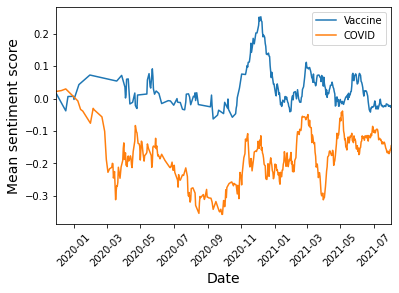

In [ ]:
d=get_sentiment_dictionary_per_topic(4)
d = dict((k, v) for k, v in d.items() if k >= datetime.datetime(2019,1,1))
dates=list(d.keys())
sentiment_scores=list(d.values())
mean_sentiment=[np.mean(sentiment_scores[i:i+30]) for i in range(len(sentiment_scores)-30)]
#len(mean_sentiment)
dates=dates[30:]
dates_1 = dates
#len(dates)

plt.figure()
plt.plot(dates,mean_sentiment, label='Vaccine')

d=get_sentiment_dictionary_per_topic(5)
d = dict((k, v) for k, v in d.items() if k >= datetime.datetime(2019,1,1))
dates=list(d.keys())
sentiment_scores=list(d.values())
mean_sentiment=[np.mean(sentiment_scores[i:i+30]) for i in range(len(sentiment_scores)-30)]
#len(mean_sentiment)
dates=dates[30:]
plt.plot(dates,mean_sentiment, label='COVID')

plt.xlabel('Date',fontsize=14)
plt.ylabel('Mean sentiment score',fontsize=14)
plt.xticks(rotation=45,fontsize=10)
plt.xlim([max(min(dates), min(dates_1)), min(max(dates), max(dates_1))])
# plt.axvline(x=datetime.datetime(2020, 5, 27), color = 'cyan', linewidth = 1)
# plt.axvline(x=datetime.datetime(2021, 5, 10), color = 'cyan', linewidth = 1)
plt.legend()
plt.savefig('drive/MyDrive/Knowledge Graphs 2022/data/time_series_sentiment_3.pdf',bbox_inches='tight')
plt.show()

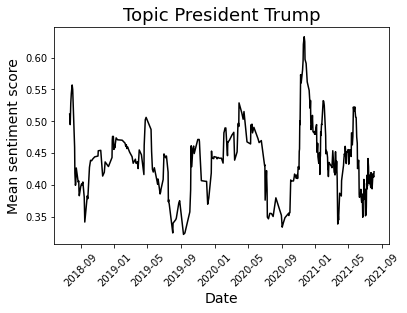

In [ ]:
#Topic greatest ever president donald trump
d=get_sentiment_dictionary_per_topic(78)
dates=list(d.keys())
sentiment_scores=list(d.values())
mean_sentiment=[np.mean(sentiment_scores[i:i+30]) for i in range(len(sentiment_scores)-30)]
#len(mean_sentiment)
dates=dates[30:]
#len(dates)

plt.figure()
plt.plot(dates,mean_sentiment,color='black')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Mean sentiment score',fontsize=14)
plt.title('Topic President Trump',fontsize=18)
plt.xticks(rotation=45,fontsize=10)
plt.savefig('drive/MyDrive/Knowledge Graphs 2022/data/time_series7.pdf',bbox_inches='tight')
plt.show()

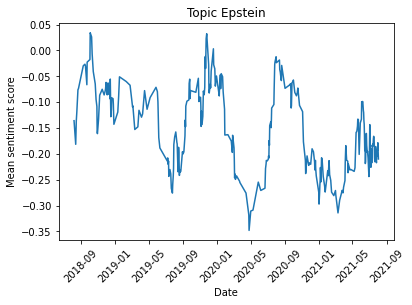

In [ ]:
#Topic Epstein
d=get_sentiment_dictionary_per_topic(93)
dates=list(d.keys())
sentiment_scores=list(d.values())
mean_sentiment=[np.mean(sentiment_scores[i:i+30]) for i in range(len(sentiment_scores)-30)]
#len(mean_sentiment)
dates=dates[30:]
#len(dates)

plt.figure()
plt.plot(dates,mean_sentiment)
plt.xlabel('Date')
plt.ylabel('Mean sentiment score')
plt.title('Topic Epstein')
plt.xticks(rotation=45)
plt.show()

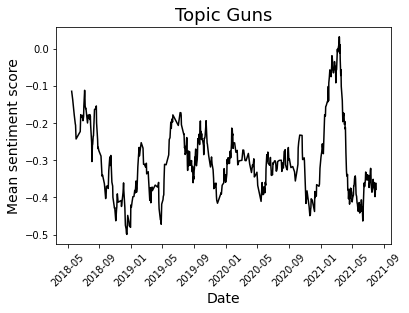

In [ ]:
#Do for guns topic:
import numpy as np
d=get_sentiment_dictionary_per_topic(41)
dates=list(d.keys())
sentiment_scores=list(d.values())
mean_sentiment=[np.mean(sentiment_scores[i:i+30]) for i in range(len(sentiment_scores)-30)]
#len(mean_sentiment)
dates=dates[30:]
#len(dates)

plt.figure()
plt.plot(dates,mean_sentiment,color='black')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Mean sentiment score',fontsize=14)
plt.title('Topic Guns',fontsize=18)
plt.xticks(rotation=45,fontsize=10)
plt.savefig('drive/MyDrive/Knowledge Graphs 2022/data/time_series9.pdf',bbox_inches='tight')
plt.show()

#Sentiment analysis per communities

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/MyDrive/Knowledge Graphs 2022/data/'
import pandas as pd
df_tweets_full=pd.read_csv(path+'all_tweets.csv')
len(df_tweets_full) #923385
df_tweets=df_tweets_full[df_tweets_full['cleaned_text']!='[]']
len(df_tweets) #784534


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


784534

<BarContainer object of 238 artists>

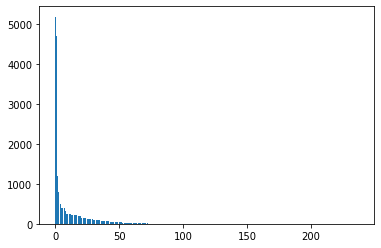

In [ ]:
comm=pd.read_csv('drive/MyDrive/Knowledge Graphs 2022/social network/snapshots/communities/louvain/2021-07-31.csv')


for i in comm.columns:
    comm[[i]] = comm[[i]].dropna().astype(int).astype(str)
comm

communities=[]
for i in range(len(comm)):
  community_i_nodes=list(comm.iloc[i].dropna())
  #community_i_nodes=set(comm.iloc[i].index).union(set(list(comm.iloc[0].dropna())))
  communities.append(community_i_nodes)

#Top 5 communities
len(communities[0]) #5175
len(communities[1]) #4701
len(communities[2]) #1197
len(communities[3]) #788
len(communities[4]) #492

length_comms=[len(i) for i in communities]
import matplotlib.pyplot as plt
plt.bar([i for i in range(len(communities))],length_comms)

In [ ]:
tweets_needed=[]
for i in range(3):
  users=[int(x) for x in communities[i]]
  tweets=list(df_tweets[df_tweets['user_id'].isin(users)]['id'])
  tweets_needed.append(tweets)


In [ ]:
sentiment_scores=pd.read_csv('drive/MyDrive/Knowledge Graphs 2022/data/df_tweets_sentiment_scores.csv')
sentiment_scores_needed=[]
for i in range(3):
  tweets=tweets_needed[i]
  sentiments=list(sentiment_scores[sentiment_scores['id'].isin(tweets)]['sentiment_score'])
  sentiment_scores_needed.append(sentiments)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


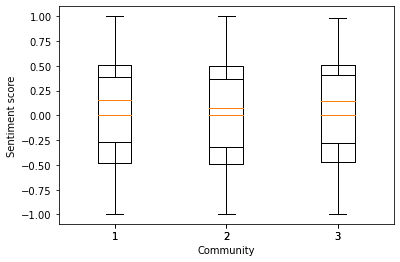

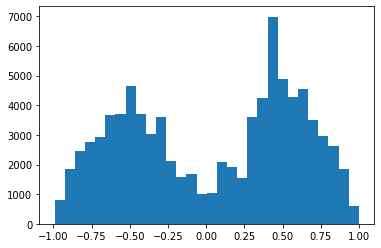

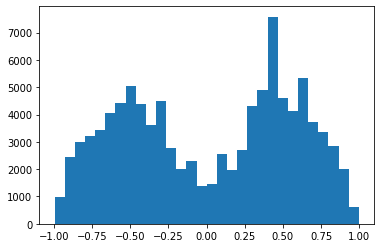

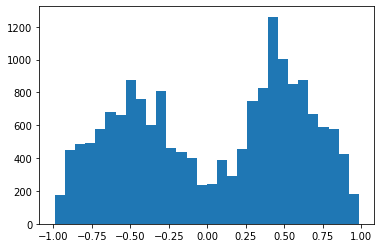

In [ ]:
#Do some exploratory data analysis: 
########### Delete the ones with sentiment score 0: 
sentiment_scores_cleaned=[]
for i in range(3):
  sent_scores=sentiment_scores_needed[i]
  sent_scores_cleaned=[k for k in sent_scores if k!=0]
  sentiment_scores_cleaned.append(sent_scores_cleaned)

plt.boxplot([sentiment_scores_needed[0],sentiment_scores_needed[1],sentiment_scores_needed[2]])
plt.boxplot([sentiment_scores_cleaned[0],sentiment_scores_cleaned[1],sentiment_scores_cleaned[2]])
plt.xlabel('Community')
plt.ylabel('Sentiment score')
#plt.hist(sentiment_scores_needed[0],bins=30)
plt.figure()
plt.hist(sentiment_scores_cleaned[0],bins=30)
plt.show()
plt.figure()
plt.hist(sentiment_scores_cleaned[1],bins=30)
plt.show()
plt.figure()
plt.hist(sentiment_scores_cleaned[2],bins=30)
plt.show()

In [ ]:
#Emotion analysis per community: 
emotions_needed=list()
for i in range(3):
  emotions_i=list(df_tweets[df_tweets['id'].isin(tweets_needed[i])]['emotion'])
  emotions_needed.append(emotions_i)

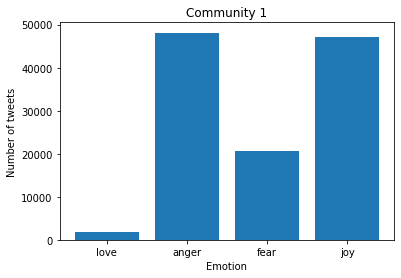

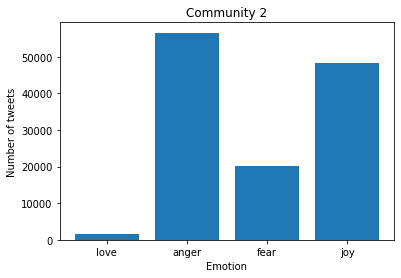

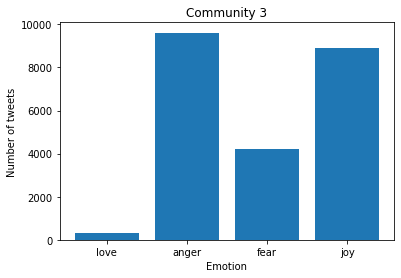

In [ ]:
from collections import Counter
emotions=[dict(Counter(i)) for i in emotions_needed]

for i in range(3):
  emotions_0=dict()
  if 'love' in emotions[i].keys():
    emotions_0['love']=emotions[i]['love']
  else:
    emotions_0['love']=0
  if 'anger' in emotions[i].keys():
    emotions_0['anger']=emotions[i]['anger']
  else:
    emotions_0['anger']=0
  if 'fear' in emotions[i].keys():
    emotions_0['fear']=emotions[i]['fear']
  else:
    emotions_0['fear']=0
  if 'joy' in emotions[i].keys():
    emotions_0['joy']=emotions[i]['joy']
  else:
    emotions_0['joy']=0

  names = list(emotions_0.keys())
  values = list(emotions_0.values())

  plt.figure()
  plt.bar(range(len(emotions_0)), values, tick_label=names)
  plt.xlabel('Emotion')
  plt.ylabel('Number of tweets')
  plt.title('Community '+str(i+1))
  plt.show()

#Sentiment and emotion analysis time data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/MyDrive/Knowledge Graphs 2022/data/'
import pandas as pd
df_tweets_full=pd.read_csv(path+'all_tweets.csv')
len(df_tweets_full) #923385
df_tweets=df_tweets_full[df_tweets_full['cleaned_text']!='[]']
len(df_tweets) #784534


import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
from datetime import datetime as dt
from tqdm import tqdm
import itertools
from collections import Counter
import random
import pickle 

dates_in_dateform=list()
for date in list(df_tweets['time']):
  d=dt.strptime(date, '%a %b %d %H:%M:%S %z %Y').strftime('%b %d %Y')
  dates_in_dateform.append(dt.strptime(d,'%b %d %Y'))
#len(dates_in_dateform)
#len(df_tweets)
df_tweets['time']=dates_in_dateform


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


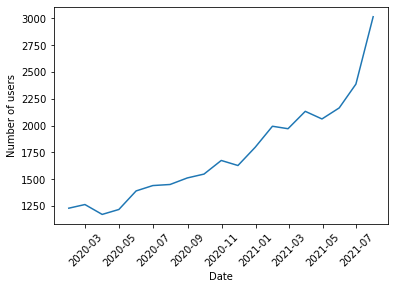

'\nidx = 1 #second largest community analysis if we want largest 3 communities, idx=0, 1, 2\nwith open(f"drive/MyDrive/Knowledge Graphs 2022/social network/snapshots/community_nodes/users/community_{idx}.pickle", \'rb\') as f:\n  test = pickle.load(f)\n\nevolution=[len(test[i]) for i in range(len(test))]\nplt.figure()\nplt.plot(list(snapshot_time_points),evolution)\nplt.xlabel(\'Date\')\nplt.ylabel(\'Number of users\')\nplt.xticks(rotation=45)\nplt.show()\n\nidx = 2 #third largest community analysis if we want largest 3 communities, idx=0, 1, 2\nwith open(f"drive/MyDrive/Knowledge Graphs 2022/social network/snapshots/community_nodes/users/community_{idx}.pickle", \'rb\') as f:\n  test = pickle.load(f)\n\nevolution=[len(test[i]) for i in range(len(test))]\nplt.figure()\nplt.plot(list(snapshot_time_points),evolution)\nplt.xlabel(\'Date\')\nplt.ylabel(\'Number of users\')\nplt.xticks(rotation=45)\nplt.show()\n'

In [ ]:
#len(test) #19 as we have 19 time periods
#len(test[0]) #1230 nodes in the 1st period

import glob
start = dt(2020, 1, 1)
end = dt(2021, 8, 1)
snapshot_time_points = pd.date_range(start, end, freq="M")
times=[i.strftime('%Y-%m-%d') for i in snapshot_time_points]

#snapshot_time_points
#times
idx = 0 #largest community analysis if we want largest 3 communities, idx=0, 1, 2
with open(f"drive/MyDrive/Knowledge Graphs 2022/social network/snapshots/community_nodes/users/community_{idx}.pickle", 'rb') as f:
  test = pickle.load(f)
#Plot how the largest network evolves:
evolution=[len(test[i]) for i in range(len(test))]
plt.figure()
plt.plot(list(snapshot_time_points),evolution)
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation=45)
plt.show()

'''
idx = 1 #second largest community analysis if we want largest 3 communities, idx=0, 1, 2
with open(f"drive/MyDrive/Knowledge Graphs 2022/social network/snapshots/community_nodes/users/community_{idx}.pickle", 'rb') as f:
  test = pickle.load(f)

evolution=[len(test[i]) for i in range(len(test))]
plt.figure()
plt.plot(list(snapshot_time_points),evolution)
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation=45)
plt.show()

idx = 2 #third largest community analysis if we want largest 3 communities, idx=0, 1, 2
with open(f"drive/MyDrive/Knowledge Graphs 2022/social network/snapshots/community_nodes/users/community_{idx}.pickle", 'rb') as f:
  test = pickle.load(f)

evolution=[len(test[i]) for i in range(len(test))]
plt.figure()
plt.plot(list(snapshot_time_points),evolution)
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation=45)
plt.show()
'''

In [ ]:

#Get the tweets we need:

tweets_needed=[]
for i in range(len(test)):
  df_tweets_needed=df_tweets[df_tweets['time']<times[i]]
  tweets=list(df_tweets_needed[df_tweets_needed['user_id'].isin(test[i])]['id'])
  tweets_needed.append(tweets)



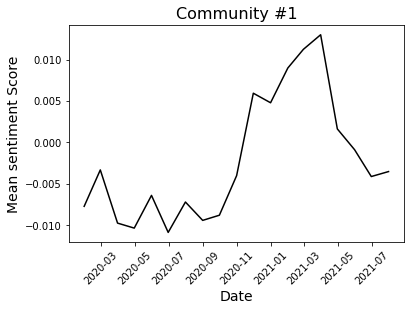

In [ ]:
sentiment_scores=pd.read_csv('drive/MyDrive/Knowledge Graphs 2022/data/df_tweets_sentiment_scores.csv')
sentiment_scores_needed=[]
for i in range(len(tweets_needed)):
  tweets=tweets_needed[i]
  sentiments=list(sentiment_scores[sentiment_scores['id'].isin(tweets)]['sentiment_score'])
  sentiment_scores_needed.append(sentiments)

########### Delete the ones with sentiment score 0: 
sentiment_scores_cleaned=[]
for i in range(len(sentiment_scores_needed)):
  sent_scores=sentiment_scores_needed[i]
  sent_scores_cleaned=[k for k in sent_scores if k!=0]
  sentiment_scores_cleaned.append(sent_scores_cleaned)

#plt.boxplot(sentiment_scores_cleaned)
mean_sentiment_largest_comm=[np.mean(i) for i in sentiment_scores_cleaned]
plt.figure()
plt.plot(list(snapshot_time_points),mean_sentiment_largest_comm,color='black')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Mean sentiment Score',fontsize=14)
plt.title('Community #1',fontsize=16)
plt.xticks(rotation=45,fontsize=10)

plt.savefig('drive/MyDrive/Knowledge Graphs 2022/data/com1_sentiment.pdf',bbox_inches='tight')
plt.show()

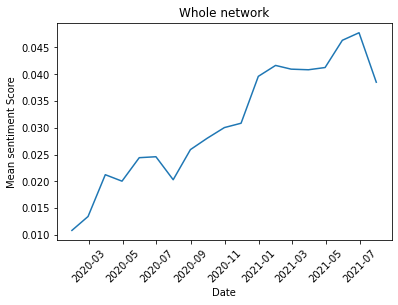

In [ ]:
nodes_sets=pd.read_csv('drive/MyDrive/Knowledge Graphs 2022/social network/snapshots/graph edges/nodes.csv')
nodes=[list(nodes_sets['graph'+str(i)]) for i in range(1,20)]

#Get the mean sentiment score for all tweets per dates: 
tweets_needed=[]
for i in range(len(nodes)):
  df_tweets_needed=df_tweets[df_tweets['time']<times[i]]
  tweets=list(df_tweets_needed[df_tweets_needed['user_id'].isin(nodes[i])]['id'])
  tweets_needed.append(tweets)

sentiment_scores=pd.read_csv('drive/MyDrive/Knowledge Graphs 2022/data/df_tweets_sentiment_scores.csv')
sentiment_scores_needed=[]
for i in range(len(tweets_needed)):
  tweets=tweets_needed[i]
  sentiments=list(sentiment_scores[sentiment_scores['id'].isin(tweets)]['sentiment_score'])
  sentiment_scores_needed.append(sentiments)

########### Delete the ones with sentiment score 0: 
sentiment_scores_cleaned=[]
for i in range(len(sentiment_scores_needed)):
  sent_scores=sentiment_scores_needed[i]
  sent_scores_cleaned=[k for k in sent_scores if k!=0]
  sentiment_scores_cleaned.append(sent_scores_cleaned)

#plt.boxplot(sentiment_scores_cleaned)
mean_sentiment_whole_nw=[np.mean(i) for i in sentiment_scores_cleaned]
plt.figure()
plt.plot(list(snapshot_time_points),mean_sentiment_whole_nw)
plt.xlabel('Date')
plt.ylabel('Mean sentiment Score')
plt.title('Whole network')
plt.xticks(rotation=45)
plt.show()

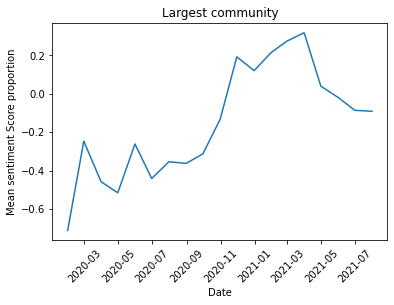

In [ ]:
#Now get the proportion:
proportion_mean_sentiment_largest=np.array(mean_sentiment_largest_comm)/np.array(mean_sentiment_whole_nw)
plt.figure()
plt.plot(list(snapshot_time_points),proportion_mean_sentiment_largest)
plt.xlabel('Date')
plt.ylabel('Mean sentiment Score proportion')
plt.title('Largest community')
plt.xticks(rotation=45)
plt.show()

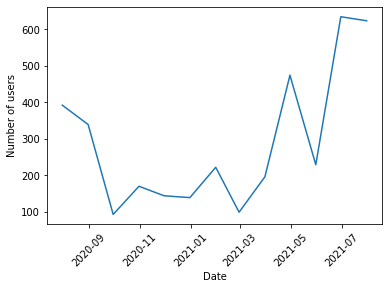

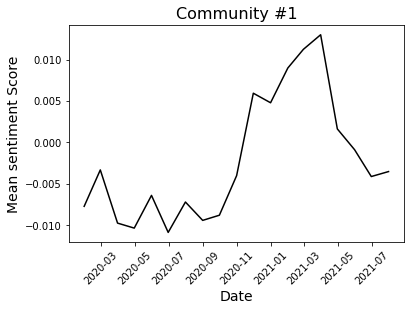

In [ ]:
#Look at community 3 (idx=2)
idx = 2 #third largest community analysis if we want largest 3 communities, idx=0, 1, 2
with open(f"drive/MyDrive/Knowledge Graphs 2022/social network/snapshots/community_nodes/users/community_{idx}.pickle", 'rb') as f:
  test = pickle.load(f)

evolution=[len(test[i]) for i in range(len(test))]
plt.figure()
plt.plot(list(snapshot_time_points)[-len(evolution):],evolution)
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation=45)
plt.show()

tweets_needed=[]
for i in range(len(test)):
  df_tweets_needed=df_tweets[df_tweets['time']<times[i]]
  tweets=list(df_tweets_needed[df_tweets_needed['user_id'].isin(test[i])]['id'])
  tweets_needed.append(tweets)
  
sentiment_scores=pd.read_csv('drive/MyDrive/Knowledge Graphs 2022/data/df_tweets_sentiment_scores.csv')
sentiment_scores_needed=[]
for i in range(len(tweets_needed)):
  tweets=tweets_needed[i]
  sentiments=list(sentiment_scores[sentiment_scores['id'].isin(tweets)]['sentiment_score'])
  sentiment_scores_needed.append(sentiments)

########### Delete the ones with sentiment score 0: 
sentiment_scores_cleaned=[]
for i in range(len(sentiment_scores_needed)):
  sent_scores=sentiment_scores_needed[i]
  sent_scores_cleaned=[k for k in sent_scores if k!=0]
  sentiment_scores_cleaned.append(sent_scores_cleaned)

#plt.boxplot(sentiment_scores_cleaned)
mean_sentiment_comm_3=[np.mean(i) for i in sentiment_scores_cleaned]
plt.figure()
plt.plot(list(snapshot_time_points),mean_sentiment_largest_comm,color='black')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Mean sentiment Score',fontsize=14)
plt.title('Community #1',fontsize=16)
plt.xticks(rotation=45,fontsize=10)
#plt.savefig('drive/MyDrive/Knowledge Graphs 2022/data/com1_sentiment.pdf',bbox_inches='tight')
plt.show()


In [ ]:
def plot_mean_sentiment(idx):
  with open(f"drive/MyDrive/Knowledge Graphs 2022/social network/snapshots/community_nodes/users/community_{idx}.pickle", 'rb') as f:
    test = pickle.load(f)

  evolution=[len(test[i]) for i in range(len(test))]
  
  #plt.figure()
  #plt.plot(list(snapshot_time_points)[-len(evolution):],evolution)
  #plt.xlabel('Date')
  #plt.ylabel('Number of users')
  #plt.xticks(rotation=45)
  #plt.show()

  tweets_needed=[]
  for i in range(len(test)):
    df_tweets_needed=df_tweets[df_tweets['time']<times[i]]
    tweets=list(df_tweets_needed[df_tweets_needed['user_id'].isin(test[i])]['id'])
    tweets_needed.append(tweets)
    
  sentiment_scores=pd.read_csv('drive/MyDrive/Knowledge Graphs 2022/data/df_tweets_sentiment_scores.csv')
  sentiment_scores_needed=[]
  for i in range(len(tweets_needed)):
    tweets=tweets_needed[i]
    sentiments=list(sentiment_scores[sentiment_scores['id'].isin(tweets)]['sentiment_score'])
    sentiment_scores_needed.append(sentiments)

  ########### Delete the ones with sentiment score 0: 
  sentiment_scores_cleaned=[]
  for i in range(len(sentiment_scores_needed)):
    sent_scores=sentiment_scores_needed[i]
    sent_scores_cleaned=[k for k in sent_scores if k!=0]
    sentiment_scores_cleaned.append(sent_scores_cleaned)

  #plt.boxplot(sentiment_scores_cleaned)
  mean_sentiment=[np.mean(i) for i in sentiment_scores_cleaned]
  plt.figure()
  plt.plot(list(snapshot_time_points)[-len(mean_sentiment):],mean_sentiment,color='black')
  plt.xlabel('Date',fontsize=14)
  plt.ylabel('Mean sentiment Score',fontsize=14)
  plt.title('Community #'+str(idx+1),fontsize=16)
  plt.xticks(rotation=45,fontsize=10) 
  plt.savefig('drive/MyDrive/Knowledge Graphs 2022/data/sentiment10.pdf',bbox_inches='tight')
  plt.show()

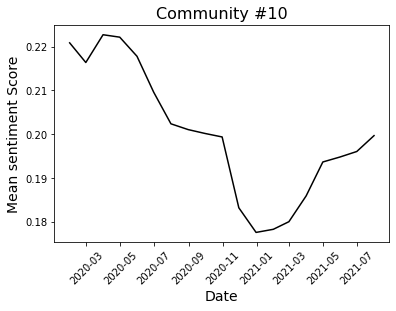

In [ ]:
idxs=[9]
for id in idxs:
  plot_mean_sentiment(id)